# **Flights Data Analysis - 2023**

## **Project Submitted by:**
### **Badrish Madapuji Srinivasan**

## Introduction

Air travel is a critical component of global transportation, connecting people and goods across regions and continents. However, flight delays are a major issue impacting airlines, passengers, and airport operations. This project analyzes flight data from the three major New York City airports (JFK, LGA, and EWR) in the year 2023. By examining flight, airline, weather, and aircraft data, we aim to uncover insights into factors contributing to flight delays and develop predictive models for better decision-making

## **Problem Statement**
Flight delays are a persistent challenge for the aviation industry, resulting in financial losses, passenger inconvenience, and operational inefficiencies. The challenge is to:

* Identify key factors contributing to flight delays using flight, weather, and aircraft data.
* Predict arrival delays (regression) based on available features.
* Classify flights as on-time or delayed (classification task) to help stakeholders improve their operational planning.

# **Objectives**
The main objectives of this project are:

## Data Understanding:

* Load and explore the structure, size, and contents of the datasets.

## Exploratory Data Analysis (EDA):

* Univariate Analysis: Explore individual variables to understand distributions and patterns.
* Bivariate Analysis: Analyze relationships between two variables, such as delays and weather conditions.
* Multivariate Analysis: Study relationships involving multiple features simultaneously.

## Data Preprocessing:

* Remove irrelevant features.
* Handle missing values.
* Treat outliers.
* Encode categorical features into numerical values.
* Scale numerical features.


## Supervised Learning:

* Regression Task: Predict continuous values like arrival delays.
* Classification Task: Categorize flights into on-time or delayed.

### Step 1: Import Libraries

In this step, we import the necessary Python libraries for data analysis, visualization, preprocessing, and machine learning:

- **Basic Libraries**:
  - `pandas`: For data manipulation and analysis, such as loading datasets and handling DataFrames.
  - `numpy`: For numerical computations, including mathematical operations on arrays.

- **Visualization Libraries**:
  - `matplotlib.pyplot`: For creating static, interactive, and publication-quality plots.
  - `seaborn`: For advanced data visualization with an aesthetically pleasing interface.

- **Preprocessing Libraries**:
  - `StandardScaler`: For normalizing or scaling numerical features to ensure consistency in machine learning models.
  - `LabelEncoder`: For encoding categorical variables into numerical values.
  - `train_test_split`: For splitting the dataset into training and testing sets.

- **Machine Learning Libraries**:
  - `LinearRegression`: For building regression models to predict continuous target variables.
  - `RandomForestClassifier`: For classification tasks, used to categorize data points.
  - `mean_squared_error` and `r2_score`: Metrics to evaluate regression model performance.
  - `accuracy_score` and `confusion_matrix`: Metrics to evaluate classification models.

- **System Utilities**:
  - `warnings`: Suppresses warning messages for cleaner notebook output.

- **Style Configuration**:
  - Configures `seaborn` and `matplotlib` to use a white grid style and muted color palette for visualizations.
  - Sets the default figure size and resolution for plots to enhance clarity.

In [46]:
# Basic Libraries
import pandas as pd              # For data manipulation and analysis
import numpy as np               # For numerical computations

# Visualization Libraries
import matplotlib.pyplot as plt  # For creating plots
import seaborn as sns            # For advanced visualizations

# Preprocessing Libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder  # For scaling and encoding
from sklearn.model_selection import train_test_split            # For splitting datasets

# Machine Learning Libraries
from sklearn.linear_model import LinearRegression              # Regression model
from sklearn.ensemble import RandomForestClassifier            # Classification model
from sklearn.metrics import mean_squared_error, r2_score       # Regression metrics
from sklearn.metrics import accuracy_score, confusion_matrix   # Classification metrics

# System Utilities
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings for cleaner output

# Set Plot Style
sns.set(style="whitegrid", palette="muted")
plt.rcParams["figure.figsize"] = (10, 6)  # Set default plot size


### Step 1.1: Configure Plot Styles

This substep focuses on enhancing the visual aesthetics and clarity of plots:

- **Resolution Settings**:
  - `plt.rcParams['figure.dpi'] = 150`: Configures the figure resolution to 150 DPI, ensuring high-quality and sharp visuals suitable for presentations and reports.

- **Seaborn Customizations**:
  - `sns.set(rc={'axes.facecolor': '#EAF4FF'}, style='whitegrid', palette='deep')`:
    - Sets the axes background color to a light blue (`#EAF4FF`), creating a subtle, visually pleasing contrast.
    - Applies the `whitegrid` style, which overlays a clean grid to aid in data interpretation.
    - Uses the `deep` color palette for visually appealing and professional color schemes.



In [47]:
# Set the resolution of the plotted figures
plt.rcParams['figure.dpi'] = 150  # Higher resolution for sharper visuals

# Configure Seaborn plot styles: Set background color and use white grid with muted palette
sns.set(rc={'axes.facecolor': '#EAF4FF'}, style='whitegrid', palette='deep')


### Step 2: Load and Preview Datasets

In this step, we load the datasets into Pandas DataFrames and perform a quick inspection:

- **Loading Datasets**:
  - The datasets (`airlines`, `airports`, `flights`, `planes`, `weather`) are read using `pd.read_csv()` with specific delimiters (";") .
- **Dataset Shapes**:
  - The `.shape` attribute is used to display the number of rows and columns in each dataset.

- **Preview Data**:
  - The `.head()` method is used to display the first few rows of each dataset, providing an overview of their structure and contents.

This process helps verify that the datasets have been successfully loaded and allows for a quick glance at their structure.

In [48]:
# Read Datasets
flights = pd.read_csv("flights.csv", delimiter=';')
airlines = pd.read_csv("airlines.csv", delimiter=';')
airports = pd.read_csv("airports.csv", delimiter=';')
planes = pd.read_csv("planes.csv", delimiter=';')
weather = pd.read_csv("weather.csv", delimiter=';')

# Display Shapes of the Datasets
print("### Dataset Shapes:")
print(f"Airlines: {airlines.shape}")
print(f"Airports: {airports.shape}")
print(f"Flights: {flights.shape}")
print(f"Planes: {planes.shape}")
print(f"Weather: {weather.shape}")

# Preview First Rows of Each Dataset
print("\n### Airlines Data:")
display(airlines.head())

print("\n### Airports Data:")
display(airports.head())

print("\n### Flights Data:")
display(flights.head())

print("\n### Planes Data:")
display(planes.head())

print("\n### Weather Data:")
display(weather.head())


### Dataset Shapes:
Airlines: (14, 3)
Airports: (1251, 9)
Flights: (435352, 20)
Planes: (4840, 10)
Weather: (26204, 16)

### Airlines Data:


,Unnamed: 0,carrier,name
0,1,9E,Endeavor Air Inc.
1,2,AA,American Airlines Inc.
2,3,AS,Alaska Airlines Inc.
3,4,B6,JetBlue Airways
4,5,DL,Delta Air Lines Inc.



### Airports Data:


,Unnamed: 0,faa,name,lat,lon,alt,tz,dst,tzone
0,1,AAF,Apalachicola Regional Airport,"29,72750092","-85,02749634",20,-5.0,A,America/New_York
1,2,AAP,Andrau Airpark,"29,7224998474","-95,5883026123",79,-6.0,A,America/Chicago
2,3,ABE,Lehigh Valley International Airport,"40,652099609375","-75,440803527832",393,-5.0,A,America/New_York
3,4,ABI,Abilene Regional Airport,"32,4113006592","-99,6819000244",1791,-6.0,A,America/Chicago
4,5,ABL,Ambler Airport,"67,1063","-157,856989",334,-9.0,A,America/Anchorage



### Flights Data:


,Unnamed: 0,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,1,2023,1,1,1.0,2038,203.0,328.0,3,205.0,UA,628,N25201,EWR,SMF,367.0,2500,20,38,2023-01-01 20:00:00
1,2,2023,1,1,18.0,2300,78.0,228.0,135,53.0,DL,393,N830DN,JFK,ATL,108.0,760,23,0,2023-01-01 23:00:00
2,3,2023,1,1,31.0,2344,47.0,500.0,426,34.0,B6,371,N807JB,JFK,BQN,190.0,1576,23,44,2023-01-01 23:00:00
3,4,2023,1,1,33.0,2140,173.0,238.0,2352,166.0,B6,1053,N265JB,JFK,CHS,108.0,636,21,40,2023-01-01 21:00:00
4,5,2023,1,1,36.0,2048,228.0,223.0,2252,211.0,UA,219,N17730,EWR,DTW,80.0,488,20,48,2023-01-01 20:00:00



### Planes Data:


,Unnamed: 0,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,1,N101DQ,2020.0,Fixed wing multi engine,AIRBUS,A321-211,2,199,0,Turbo-fan
1,2,N101DU,2018.0,Fixed wing multi engine,C SERIES AIRCRAFT LTD PTNRSP,BD-500-1A10,2,133,0,Turbo-fan
2,3,N101HQ,2007.0,Fixed wing multi engine,EMBRAER-EMPRESA BRASILEIRA DE,ERJ 170-200 LR,2,80,0,Turbo-fan
3,4,N101NN,2013.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A321-231,2,379,0,Turbo-fan
4,5,N102DN,2020.0,Fixed wing multi engine,AIRBUS,A321-211,2,199,0,Turbo-fan



### Weather Data:


,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,1,JFK,2023,1,1,0,NaN,NaN,NaN,0.0,0,0,NaN,NaN,"0,25",2023-01-01 09:00:00
1,2,JFK,2023,1,1,1,NaN,NaN,NaN,190.0,"4,60312","5,2971784336",NaN,NaN,"2,5",2023-01-01 10:00:00
2,3,JFK,2023,1,1,2,NaN,NaN,NaN,190.0,"5,7539","6,621473042",NaN,NaN,"0,25",2023-01-01 11:00:00
3,4,JFK,2023,1,1,3,NaN,NaN,NaN,250.0,"5,7539","6,621473042","0,02",NaN,4,2023-01-01 12:00:00
4,5,JFK,2023,1,1,4,NaN,NaN,NaN,170.0,"8,05546","9,2700622588",NaN,NaN,"0,75",2023-01-01 13:00:00


---
## **Step 3: Dataset Overview**

This step provides a summary of each dataset to understand its structure, data types, and missing values. It ensures that the data is ready for further analysis by identifying inconsistencies or areas requiring preprocessing.

---

#### **1. Dataset Structure**
- Used `.info()` to summarize column names, data types, and the count of non-null values for each dataset.
- This helps identify:
  - Columns with missing values.
  - Data types requiring conversion for consistency (e.g., datetime, categorical).

---

In [49]:
# Dataset Overview: Using info() to summarize each dataset

print("### Airlines Dataset Overview")
print(airlines.info(), "\n")

print("### Airports Dataset Overview")
print(airports.info(), "\n")

print("### Flights Dataset Overview")
print(flights.info(), "\n")

print("### Planes Dataset Overview")
print(planes.info(), "\n")

print("### Weather Dataset Overview")
print(weather.info(), "\n")


### Airlines Dataset Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  14 non-null     int64 
 1   carrier     14 non-null     object
 2   name        14 non-null     object
dtypes: int64(1), object(2)
memory usage: 468.0+ bytes
None 

### Airports Dataset Overview
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1251 entries, 0 to 1250
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1251 non-null   int64  
 1   faa         1251 non-null   object 
 2   name        1251 non-null   object 
 3   lat         1251 non-null   object 
 4   lon         1251 non-null   object 
 5   alt         1251 non-null   int64  
 6   tz          1203 non-null   float64
 7   dst         1203 non-null   object 
 8   tzone       1132 non-null   object 
dtypes: float64(1),

---
## **Step 4: Data Cleaning and Preprocessing**

This step involves cleaning and preprocessing the datasets to ensure consistency, handle missing values, and prepare the data for further analysis.

---

#### **1. Drop Irrelevant Columns**
- Removed `Unnamed: 0` columns from all datasets, as they appear to be redundant (e.g., autogenerated indices during CSV creation).

---

#### **2. Airports Dataset**
- Converted `lat` and `lon` columns to strings to handle any formatting inconsistencies (e.g., commas instead of periods in numerical values). Then converted them back to floats for geographical analysis.

---

#### **3. Flights Dataset**
- Converted identifier columns (`carrier`, `flight`, `tailnum`, `origin`, `dest`) to strings for consistency.
- Transformed `time_hour` to a datetime format for time-based analysis.

---

#### **4. Planes Dataset**
- Converted `year` to an integer type, filling missing values with the most common year (mode).

---

#### **5. Weather Dataset**
- Removed commas in numerical columns (`wind_speed`, `wind_gust`, `visib`) and converted them to floats.
- Filled missing values in ('temp', 'dewp', 'humid', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib') with their respective median values for robustness.

---

### **Summary**
- Redundant columns were removed.
- Numerical and datetime columns were formatted correctly.
- Missing values were handled effectively using appropriate imputation techniques.
- The datasets are now consistent and ready for analysis or merging with other datasets.

In [50]:
# Drop 'Unnamed' columns from all datasets
airlines = airlines.drop(columns=['Unnamed: 0'])
airports = airports.drop(columns=['Unnamed: 0'])
flights = flights.drop(columns=['Unnamed: 0'])
planes = planes.drop(columns=['Unnamed: 0'])
weather = weather.drop(columns=['Unnamed: 0'])
# Drop rows with missing 'year' in the 'planes' DataFrame
planes = planes.dropna(subset=['year'])
# Airports Dataset
# Convert 'lat' and 'lon' to string first, then replace commas with periods and convert them to float
airports['lat'] = airports['lat'].astype(str).str.replace(',', '.').astype(float, errors='ignore')
airports['lon'] = airports['lon'].astype(str).str.replace(',', '.').astype(float, errors='ignore')

# Flights Dataset
def format_time(df, column_name):

    df[column_name] = df[column_name].astype(str)  # Convert to string
    # Handle potential float values with .0
    df[column_name] = df[column_name].str.replace('\.0$', '', regex=True)

    # Apply padding and insert colon
    df[column_name] = df[column_name].str.zfill(4).str[:2] + ':' + df[column_name].str.zfill(4).str[2:]

    return df

flights = format_time(flights, 'dep_time')
flights = format_time(flights, 'sched_dep_time')
flights = format_time(flights, 'arr_time')
flights = format_time(flights, 'sched_arr_time')

# Remove missing rows 
flights = flights.dropna()

# Weather Dataset
colms_to_convert = ['temp', 'dewp', 'humid', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib']

for col in colms_to_convert:
    # Replacing '','' with ''.'' for separator
    weather[col] = weather[col].str.replace(',', '.', regex=False)

    # Removing non-numeric characters 
    weather[col] = weather[col].str.replace('[^0-9.-]', '', regex=True)

    # Convert to numeric
    weather[col] = pd.to_numeric(weather[col], errors='coerce')



## **Step 5: Summary Statistics for Numerical Variables**

---

### **1. Airlines Dataset**
- The dataset contains no numerical data; thus, no summary statistics are available.

---

### **2. Airports Dataset**
- Summary statistics for numerical variables include metrics like mean, standard deviation, minimum, and maximum values, providing insights into geographical data like latitude (`lat`) and longitude (`lon`).

---

### **3. Flights Dataset**
- Summarized statistics for numerical variables such as `dep_delay`, `arr_delay`, `distance`, and `air_time` help identify trends, outliers, and distributions of flight-related data.

---

### **4. Planes Dataset**
- Provides descriptive statistics for numerical columns like `year`, indicating the distribution of plane manufacturing years.

---

### **5. Weather Dataset**
- Summary statistics for weather-related numerical variables such as `wind_speed`, `wind_gust`, and `visib` offer insights into weather conditions that may influence flight delays.

---

### **Key Insights**
- Summary statistics help understand the range and distribution of numerical data across all datasets.
- These metrics also aid in identifying anomalies, skewness, and potential outliers for further preprocessing or analysis.

In [51]:
# Summary Statistics for Numerical Variables

# Airlines Dataset: No numerical data, so no summary statistics
print("### Airlines Dataset (No Numerical Data)")
print(airlines.describe().T)

# Airports Dataset: Get the summary statistics for numerical variables
print("### Airports Dataset")
print(airports.describe().T)

# Flights Dataset: Get the summary statistics for numerical variables
print("### Flights Dataset")
print(flights.describe().T)

# Planes Dataset: Get the summary statistics for numerical variables
print("### Planes Dataset")
print(planes.describe().T)

# Weather Dataset: Get the summary statistics for numerical variables
print("### Weather Dataset")
print(weather.describe().T)


### Airlines Dataset (No Numerical Data)
        count unique                top freq
carrier    14     14                 9E    1
name       14     14  Endeavor Air Inc.    1
### Airports Dataset
      count         mean          std         min       25%         50%  \
lat  1251.0    40.933284    10.193500   19.721399   34.1035   39.345100   
lon  1251.0  -103.465931    28.112110 -176.645996 -117.8760  -95.912498   
alt  1251.0  1121.992006  1602.521826 -115.000000   96.0000  551.000000   
tz   1203.0    -6.501247     1.585277  -10.000000   -8.0000   -6.000000   

             75%          max  
lat    44.316700    71.285402  
lon   -83.286251   174.113998  
alt  1226.000000  9070.000000  
tz     -5.000000     8.000000  
### Flights Dataset
              count         mean         std     min     25%     50%     75%  \
year       422818.0  2023.000000    0.000000  2023.0  2023.0  2023.0  2023.0   
month      422818.0     6.428752    3.439978     1.0     3.0     6.0     9.0   
day    

## **Step 5: Summary Statistics for Categorical Variables**

---

### **1. Airlines Dataset**
- Summary statistics for categorical variables include:
  - Count of non-null values.
  - Number of unique categories.
  - The most frequent category and its frequency.

---

### **2. Airports Dataset**
- Provides descriptive statistics for categorical columns like airport codes or names, revealing the diversity of airports in the dataset.

---

### **3. Flights Dataset**
- Summarizes identifiers like `carrier`, `tailnum`, `origin`, and `dest`, which help understand the variety of flights and their origins/destinations.

---

### **4. Planes Dataset**
- Includes statistics for categorical variables such as `manufacturer` and `model`, which indicate the diversity of planes in the dataset.

---

### **5. Weather Dataset**
- Provides statistics for categorical columns like `origin`, giving insights into the variety of weather data points based on location.

---

### **Key Insights**
- Summary statistics for categorical variables help identify data variety, dominant categories, and potential imbalances within the datasets.
- These metrics provide foundational understanding for further analysis or preprocessing of categorical features.

In [52]:
# Summary Statistics for Categorical Variables

# Airlines Dataset: Get the summary statistics for categorical variables
print("### Airlines Dataset")
print(airlines.describe(include='object'))

# Airports Dataset: Get the summary statistics for categorical variables
print("### Airports Dataset")
print(airports.describe(include='object'))

# Flights Dataset: Get the summary statistics for categorical variables
print("### Flights Dataset")
print(flights.describe(include='object'))

# Planes Dataset: Get the summary statistics for categorical variables
print("### Planes Dataset")
print(planes.describe(include='object'))

# Weather Dataset: Get the summary statistics for categorical variables
print("### Weather Dataset")
print(weather.describe(include='object'))


### Airlines Dataset
       carrier               name
count       14                 14
unique      14                 14
top         9E  Endeavor Air Inc.
freq         1                  1
### Airports Dataset
         faa                  name   dst             tzone
count   1251                  1251  1203              1132
unique  1251                  1248     4                 9
top      ZZV  Capital City Airport     A  America/New_York
freq       1                     3  1159               367
### Flights Dataset
       dep_time sched_dep_time arr_time sched_arr_time carrier tailnum  \
count    422818         422818   422818         422818  422818  422818   
unique     1365           1060     1433           1200      14    5114   
top       05:55          06:00    10:12          23:59      YX  N490PX   
freq       1028           9054      603           1956   85431     718   

        origin    dest            time_hour  
count   422818  422818               422818  
unique    

# Merging datasets to form a final dataset for future analysis

In [53]:
# Step-by-step merge
# 1. Merge flights with airlines on 'carrier'
merged_data = pd.merge(flights, airlines, on='carrier', how='left', suffixes=('', '_airlines'))

# 2. Merge with planes on 'tailnum'
# recast year column in planes to int64
planes['year'] = pd.to_numeric(planes['year'], errors='coerce').astype('Int64')
merged_data['year'] = pd.to_numeric(merged_data['year'], errors='coerce').astype('Int64')

# merge
merged_data = pd.merge(merged_data, planes, on=['tailnum'], how='left', suffixes=('', '_planes'))

# 3. Merge with weather on 'origin', 'year', 'month', 'day', and 'hour'
merged_data = pd.merge(
    merged_data,
    weather,
    on=['origin', 'year', 'month', 'day', 'hour'],
    how='left',
    suffixes=('', '_weather')
)

# 4. Merge with airports on 'origin' and 'faa'
merged_final = pd.merge(
    merged_data,
    airports,
    left_on='origin',
    right_on='faa',
    how='left',
    suffixes=('', '_airports')
)


# Display the first few rows of the combined dataset
merged_final.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,...,visib,time_hour_weather,faa,name_airports,lat,lon,alt,tz,dst,tzone
0,2023,1,1,00:01,20:38,203.0,03:28,00:03,205.0,UA,...,10.0,2023-01-02 05:00:00,EWR,Newark Liberty International Airport,40.692501,-74.168701,18,-5.0,A,America/New_York
1,2023,1,1,00:18,23:00,78.0,02:28,01:35,53.0,DL,...,10.0,2023-01-02 08:00:00,JFK,John F Kennedy International Airport,40.639801,-73.778900,13,-5.0,A,America/New_York
2,2023,1,1,00:31,23:44,47.0,05:00,04:26,34.0,B6,...,10.0,2023-01-02 08:00:00,JFK,John F Kennedy International Airport,40.639801,-73.778900,13,-5.0,A,America/New_York
3,2023,1,1,00:33,21:40,173.0,02:38,23:52,166.0,B6,...,10.0,2023-01-02 06:00:00,JFK,John F Kennedy International Airport,40.639801,-73.778900,13,-5.0,A,America/New_York
4,2023,1,1,00:36,20:48,228.0,02:23,22:52,211.0,UA,...,10.0,2023-01-02 05:00:00,EWR,Newark Liberty International Airport,40.692501,-74.168701,18,-5.0,A,America/New_York


In [54]:
merged_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422818 entries, 0 to 422817
Data columns (total 46 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   year               422818 non-null  Int64  
 1   month              422818 non-null  int64  
 2   day                422818 non-null  int64  
 3   dep_time           422818 non-null  object 
 4   sched_dep_time     422818 non-null  object 
 5   dep_delay          422818 non-null  float64
 6   arr_time           422818 non-null  object 
 7   sched_arr_time     422818 non-null  object 
 8   arr_delay          422818 non-null  float64
 9   carrier            422818 non-null  object 
 10  flight             422818 non-null  int64  
 11  tailnum            422818 non-null  object 
 12  origin             422818 non-null  object 
 13  dest               422818 non-null  object 
 14  air_time           422818 non-null  float64
 15  distance           422818 non-null  int64  
 16  ho

## **Step 6: Distribution Analysis of Flight Delays**

In this step, we analyze the distribution of flight delays to identify patterns, trends, and outliers.

---

### **1. Visualizing Delays**

#### **Departure Delay**
- **Logarithmic Scale**:
  - Shows a right-skewed distribution, with most flights having minimal delays.
  - Log scaling clarifies the distribution of extreme delays.
- **Zoomed-in View**:
  - Focuses on realistic delays within a range of `-10 to 300` minutes.

#### **Arrival Delay**
- **Logarithmic Scale**:
  - Similar to departure delays, arrival delays also exhibit a right-skewed pattern.
- **Zoomed-in View**:
  - Highlights realistic arrival delays within the range of `-10 to 300` minutes.

---

### **2. Summary Statistics**

#### **Departure Delay**
- **Full Statistics**:
  - Provides insights into the entire dataset, including extreme outliers.
- **Capped Statistics**:
  - Removes extreme outliers by capping delays at `300` minutes, providing a more focused analysis.

#### **Arrival Delay**
- **Full Statistics**:
  - Shows the overall delay pattern, including flights with significant delays.
- **Capped Statistics**:
  - Highlights the central tendency and spread of more realistic delays.

---

### **Key Observations**
- Both departure and arrival delays have a majority of flights with minimal or no delays, but a small number of flights experience significant delays (outliers).
- The zoomed-in visualizations and capped statistics provide a clearer view of typical delays, which are crucial for operational planning and predictive modeling.
- These insights will inform feature engineering and outlier handling in subsequent steps.

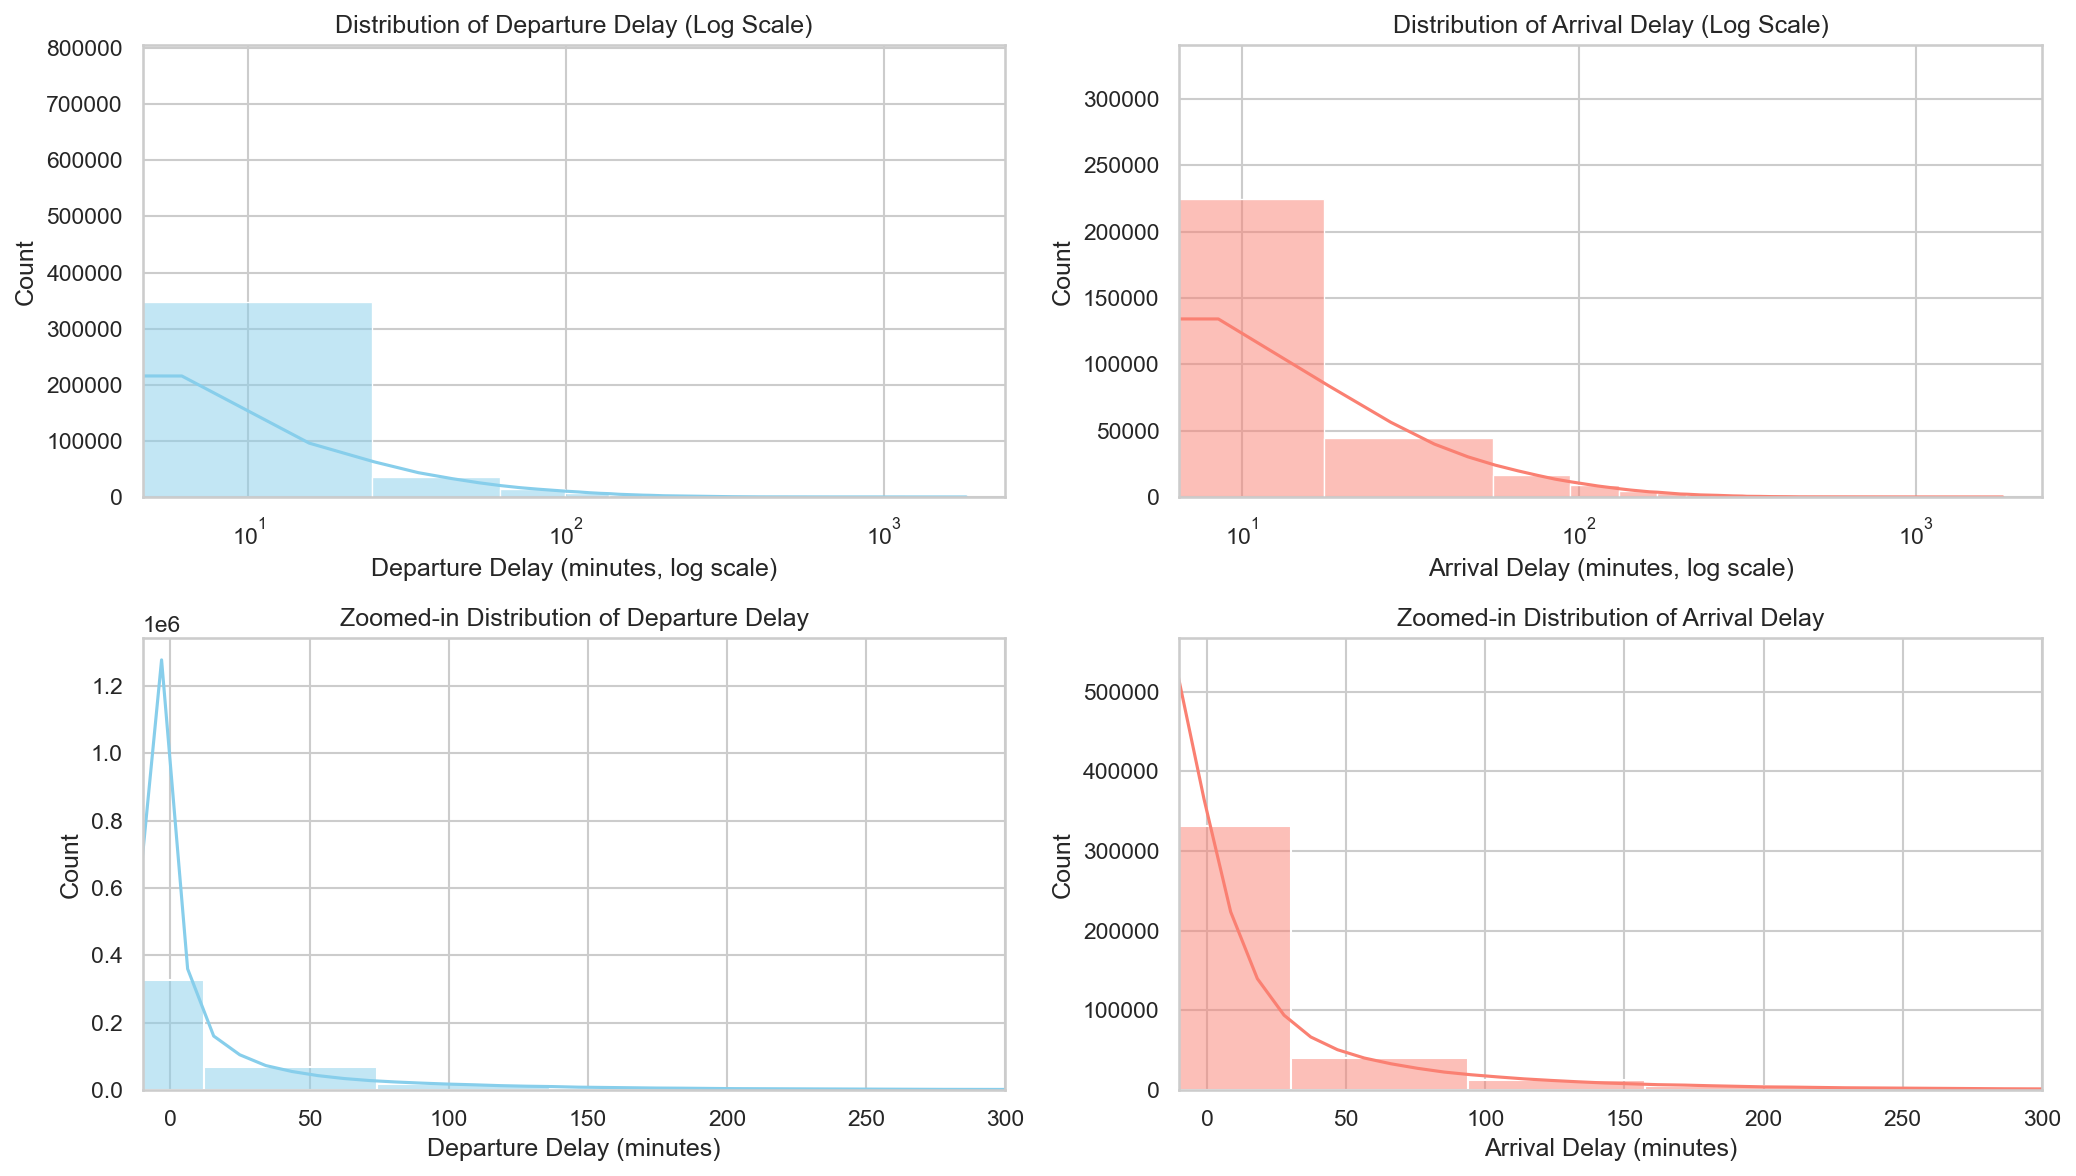

Full Departure Delay (dep_delay) Summary Stats:
count    422818.000000
mean         13.699206
std          54.079424
min         -50.000000
25%          -6.000000
50%          -2.000000
75%          10.000000
max        1813.000000
Name: dep_delay, dtype: float64

Capped Departure Delay (<300 mins) Summary Stats:
count    422818.000000
mean         12.707889
std          43.295832
min         -50.000000
25%          -6.000000
50%          -2.000000
75%          10.000000
max         300.000000
Name: dep_delay, dtype: float64

Full Arrival Delay (arr_delay) Summary Stats:
count    422818.000000
mean          4.344803
std          57.868893
min         -97.000000
25%         -22.000000
50%         -10.000000
75%           9.000000
max        1812.000000
Name: arr_delay, dtype: float64

Capped Arrival Delay (<300 mins) Summary Stats:
count    422818.000000
mean          3.367309
std          47.936919
min         -97.000000
25%         -22.000000
50%         -10.000000
75%           9.000

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'flights' DataFrame is already loaded
# Set style for better visualization
sns.set(style="whitegrid")

# Plot histograms for dep_delay and arr_delay
plt.figure(figsize=(14, 8))

# Departure Delay (Logarithmic Scale)
plt.subplot(2, 2, 1)
sns.histplot(merged_final['dep_delay'].dropna(), kde=True, bins=50, color='skyblue')
plt.xscale('log')  # Logarithmic scale for clarity
plt.title('Distribution of Departure Delay (Log Scale)')
plt.xlabel('Departure Delay (minutes, log scale)')

# Arrival Delay (Logarithmic Scale)
plt.subplot(2, 2, 2)
sns.histplot(merged_final['arr_delay'].dropna(), kde=True, bins=50, color='salmon')
plt.xscale('log')  # Logarithmic scale for clarity
plt.title('Distribution of Arrival Delay (Log Scale)')
plt.xlabel('Arrival Delay (minutes, log scale)')

# Departure Delay (Zoomed-in)
plt.subplot(2, 2, 3)
sns.histplot(merged_final['dep_delay'].dropna(), kde=True, bins=30, color='skyblue')
plt.xlim(-10, 300)  # Focus on realistic delays
plt.title('Zoomed-in Distribution of Departure Delay')
plt.xlabel('Departure Delay (minutes)')

# Arrival Delay (Zoomed-in)
plt.subplot(2, 2, 4)
sns.histplot(merged_final['arr_delay'].dropna(), kde=True, bins=30, color='salmon')
plt.xlim(-10, 300)  # Focus on realistic delays
plt.title('Zoomed-in Distribution of Arrival Delay')
plt.xlabel('Arrival Delay (minutes)')

plt.tight_layout()
plt.show()

# Summary statistics for delays
dep_delay_stats = merged_final['dep_delay'].describe()
arr_delay_stats = merged_final['arr_delay'].describe()

# Capped values to remove extreme outliers
dep_delay_capped = merged_final['dep_delay'].clip(upper=300).dropna()
arr_delay_capped = merged_final['arr_delay'].clip(upper=300).dropna()

dep_delay_capped_stats = dep_delay_capped.describe()
arr_delay_capped_stats = arr_delay_capped.describe()

# Print Summary Statistics
print("Full Departure Delay (dep_delay) Summary Stats:")
print(dep_delay_stats)

print("\nCapped Departure Delay (<300 mins) Summary Stats:")
print(dep_delay_capped_stats)

print("\nFull Arrival Delay (arr_delay) Summary Stats:")
print(arr_delay_stats)

print("\nCapped Arrival Delay (<300 mins) Summary Stats:")
print(arr_delay_capped_stats)


### Key Takeaways for Next Steps:

1. **Departure and Arrival Delays**:
   - Most delays are small, with 75% of delays under 10 minutes.
   - Outliers (extreme delays) significantly inflate the mean and standard deviation.

2. **Impact of Capping**:
   - Capping delays at 300 minutes reduces variability, improving data consistency for analysis.

3. **Arrival Patterns**:
   - Arrival delays tend to compensate for departure delays, with a median arrival delay of **-10 minutes**.

These insights guide us to focus on capped delays and address outliers in the next steps for modeling.

### Numerical Feature Analysis

- **Histograms**: Show the distributions of `wind_speed`, `wind_gust`, `visib`, `air_time`, and `distance`, highlighting patterns and outliers.
- **Boxplots**: Identify outliers in weather and flight numerical features for further preprocessing.

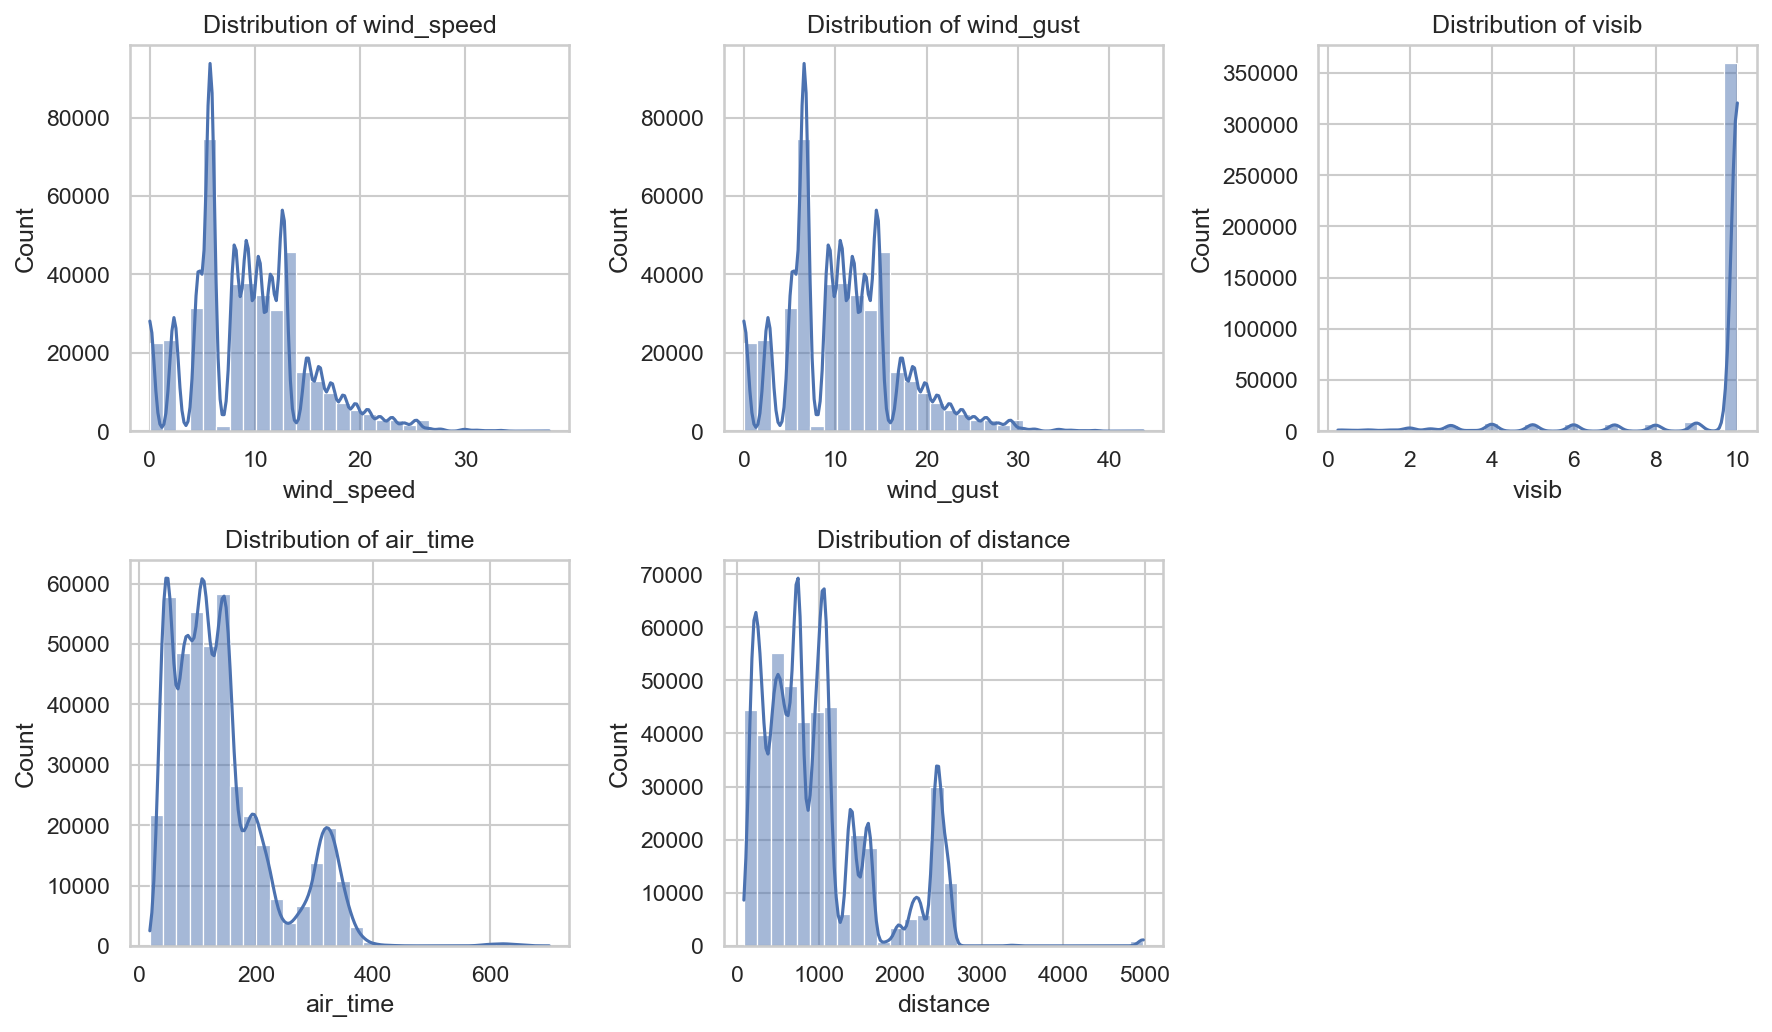

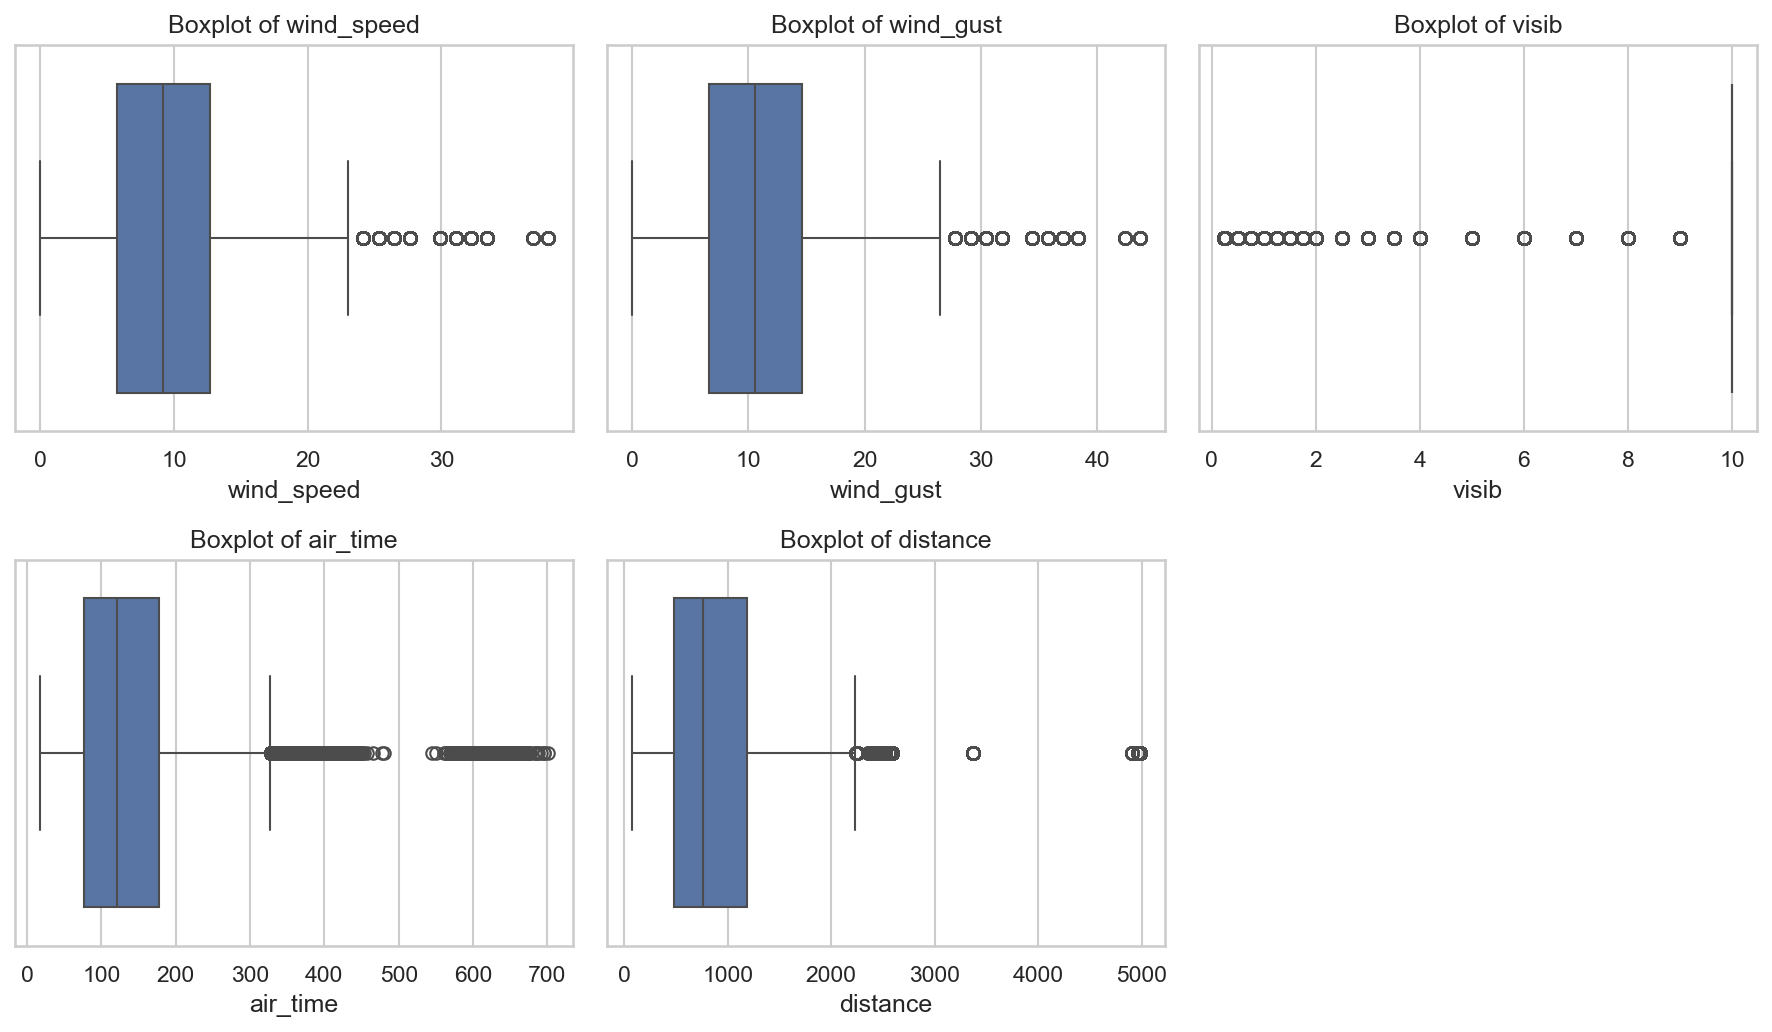

In [56]:
# List of numerical features in both weather and flight datasets
weather_features = ['wind_speed', 'wind_gust', 'visib']
flight_features = ['air_time', 'distance']

# Combined list of numerical features
all_numerical_features = weather_features + flight_features

# Plot histograms for numerical features
plt.figure(figsize=(12, 10))

for i, feature in enumerate(all_numerical_features, 1):
    plt.subplot(3, 3, i)
    if feature in weather_features:
        sns.histplot(merged_final[feature].dropna(), kde=True, bins=30)
    else:
        sns.histplot(merged_final[feature].dropna(), kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

# Boxplots for numerical features
plt.figure(figsize=(12, 10))

for i, feature in enumerate(all_numerical_features, 1):
    plt.subplot(3, 3, i)
    if feature in weather_features:
        sns.boxplot(x=merged_final[feature].dropna())
    else:
        sns.boxplot(x=merged_final[feature].dropna())
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()


### Combined Visualization: Distribution and Outliers

The histograms and boxplots together provide insights into the numerical features of the weather and flight datasets:

1. **Weather Features (`wind_speed`, `wind_gust`, `visib`)**:
   - Both `wind_speed` and `wind_gust` show right-skewed distributions with a concentration below 15 mph.
   - `visib` is heavily concentrated at 10 miles, indicating consistent clear visibility, with few outliers below 10 miles.
   - Boxplots confirm the presence of outliers in all weather features, particularly at higher values.

2. **Flight Features (`air_time`, `distance`)**:
   - `air_time` and `distance` exhibit bimodal distributions reflecting short and long-haul flights.
   - Outliers are prominent in both features, as evident from the boxplots. These could represent rare, extreme flight scenarios.

### Key Takeaway:
Both datasets contain skewed distributions and notable outliers, which should be addressed during preprocessing. Options include applying transformations (e.g., logarithmic for skewed features) and capping or imputing extreme values to improve model performance.

# 2. Bivariate Analysis
The objective of bivariate analysis is to understand the relationships between flight delays and potential influencing features.a

Delays vs Time Features (Hour, Day, Month)
Code for Boxplots of Delays vs Hour, Day, Month

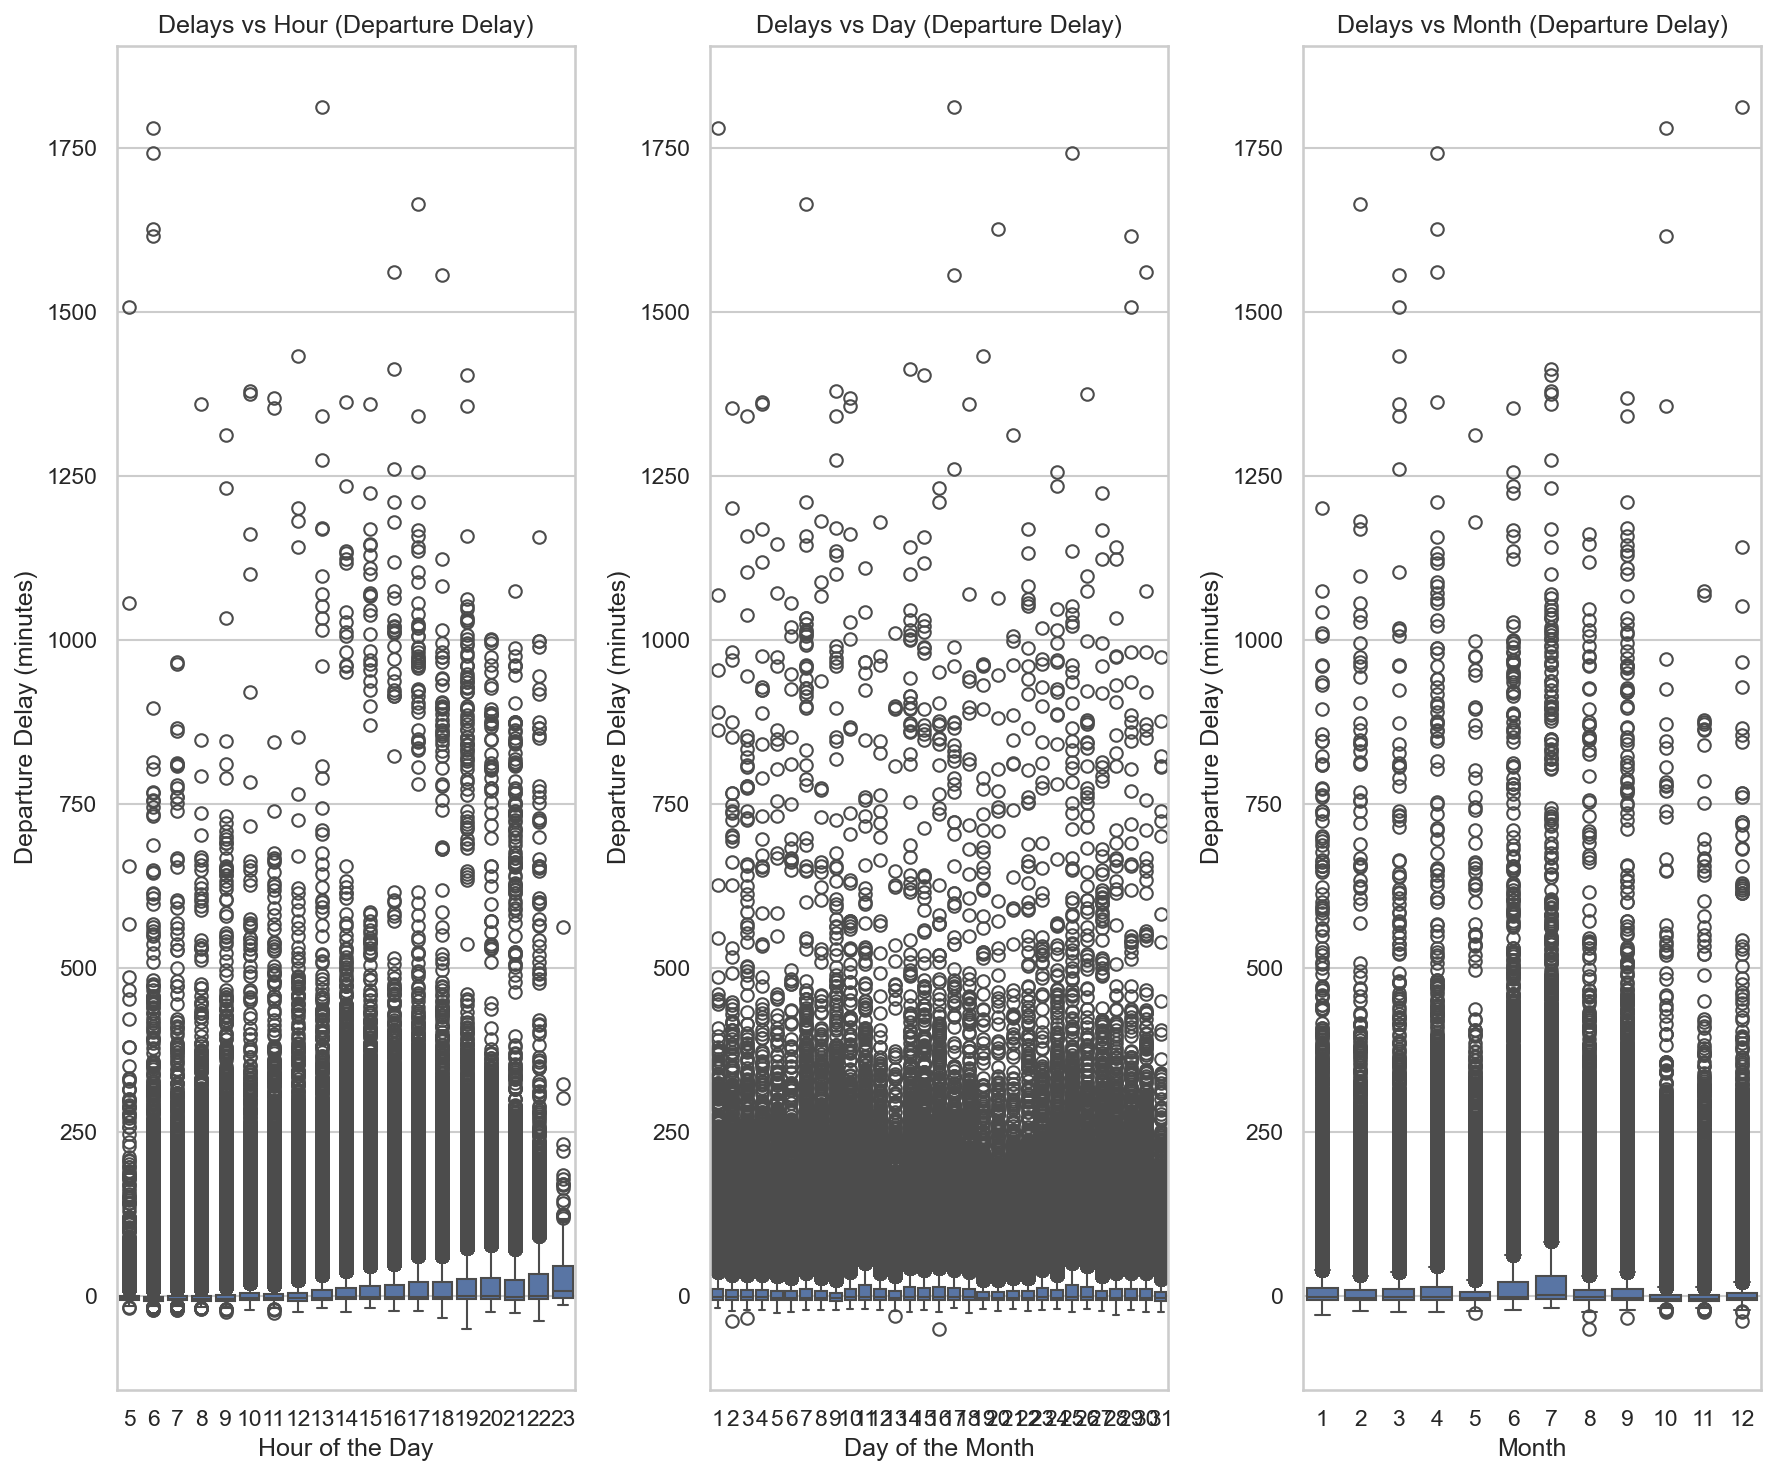

In [57]:
# Plot delays vs time features (Hour, Day, Month)
plt.figure(figsize=(12, 10))

# Delays vs Hour
plt.subplot(1, 3, 1)
sns.boxplot(x='hour', y='dep_delay', data=merged_final)
plt.title('Delays vs Hour (Departure Delay)')
plt.xlabel('Hour of the Day')
plt.ylabel('Departure Delay (minutes)')

# Delays vs Day
plt.subplot(1, 3, 2)
sns.boxplot(x='day', y='dep_delay', data=merged_final)
plt.title('Delays vs Day (Departure Delay)')
plt.xlabel('Day of the Month')
plt.ylabel('Departure Delay (minutes)')

# Delays vs Month
plt.subplot(1, 3, 3)
sns.boxplot(x='month', y='dep_delay', data=merged_final)
plt.title('Delays vs Month (Departure Delay)')
plt.xlabel('Month')
plt.ylabel('Departure Delay (minutes)')

plt.tight_layout()
plt.show()


### Relationship Between Departure Delays and Time Features

1. **Delays vs Hour**:
   - Departure delays increase significantly in the late hours of the day, peaking between 6 PM and 9 PM. Early morning hours show minimal delays.

2. **Delays vs Day**:
   - There is no clear pattern across the days of the month, indicating that delays are evenly distributed regardless of the day.

3. **Delays vs Month**:
   - Summer months (e.g., June and July) show higher delays compared to other months, likely due to increased travel demand and weather disruptions.

### Key Takeaway:
Departure delays are influenced more by the hour of the day and seasonal trends (months) than by specific days of the month. This insight can help optimize scheduling and resource allocation.

Delays vs Weather Features (temp, humid, wind_speed, wind_gust, precip, pressure, visib)

Code for Scatter Plots of Delays vs Weather Features

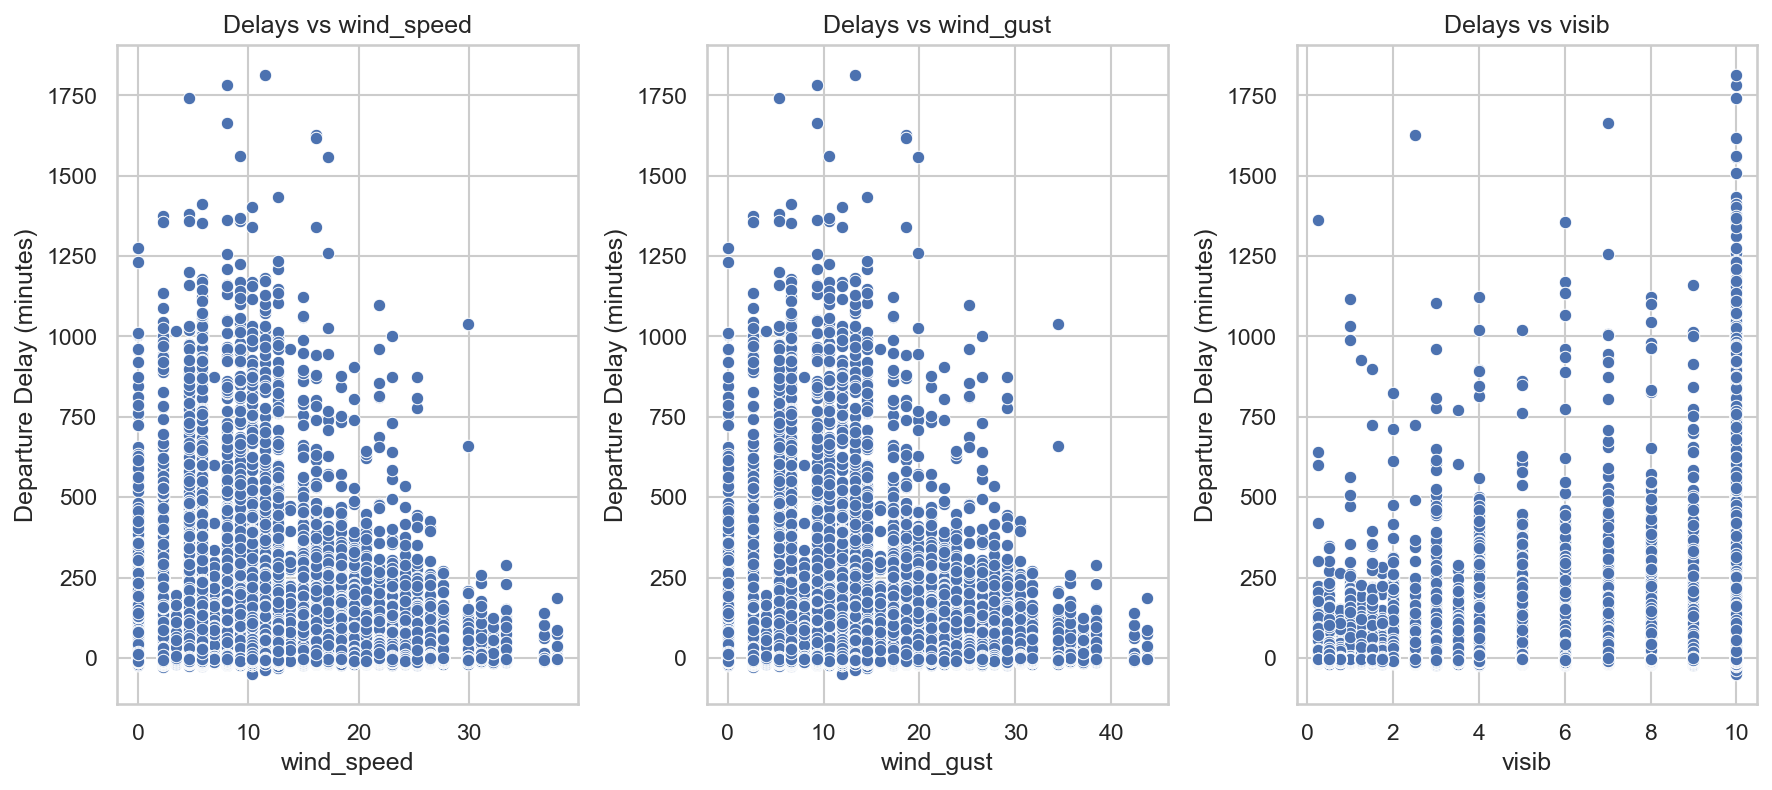

In [58]:
# Plot delays vs weather features
plt.figure(figsize=(12, 10))

for i, feature in enumerate(weather_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=merged_final[feature], y=flights['dep_delay'])
    plt.title(f'Delays vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Departure Delay (minutes)')

plt.tight_layout()
plt.show()


### Delays vs Weather Features

1. **Wind Speed**: 
   - Higher wind speeds show a slight association with increased delays, but the trend is not strongly defined.

2. **Wind Gust**:
   - Significant wind gusts appear to influence delays, indicating operational challenges during gusty conditions.

3. **Visibility**:
   - Lower visibility correlates with higher delays, reflecting operational and safety slowdowns during poor visibility conditions.

### Key Insight:
Adverse weather conditions such as high wind gusts and reduced visibility have measurable effects on departure delays, which is crucial for predictive modeling and operational strategies.

Delays vs Location Features (origin, dest, alt)


Code for Grouping Delays by Airport

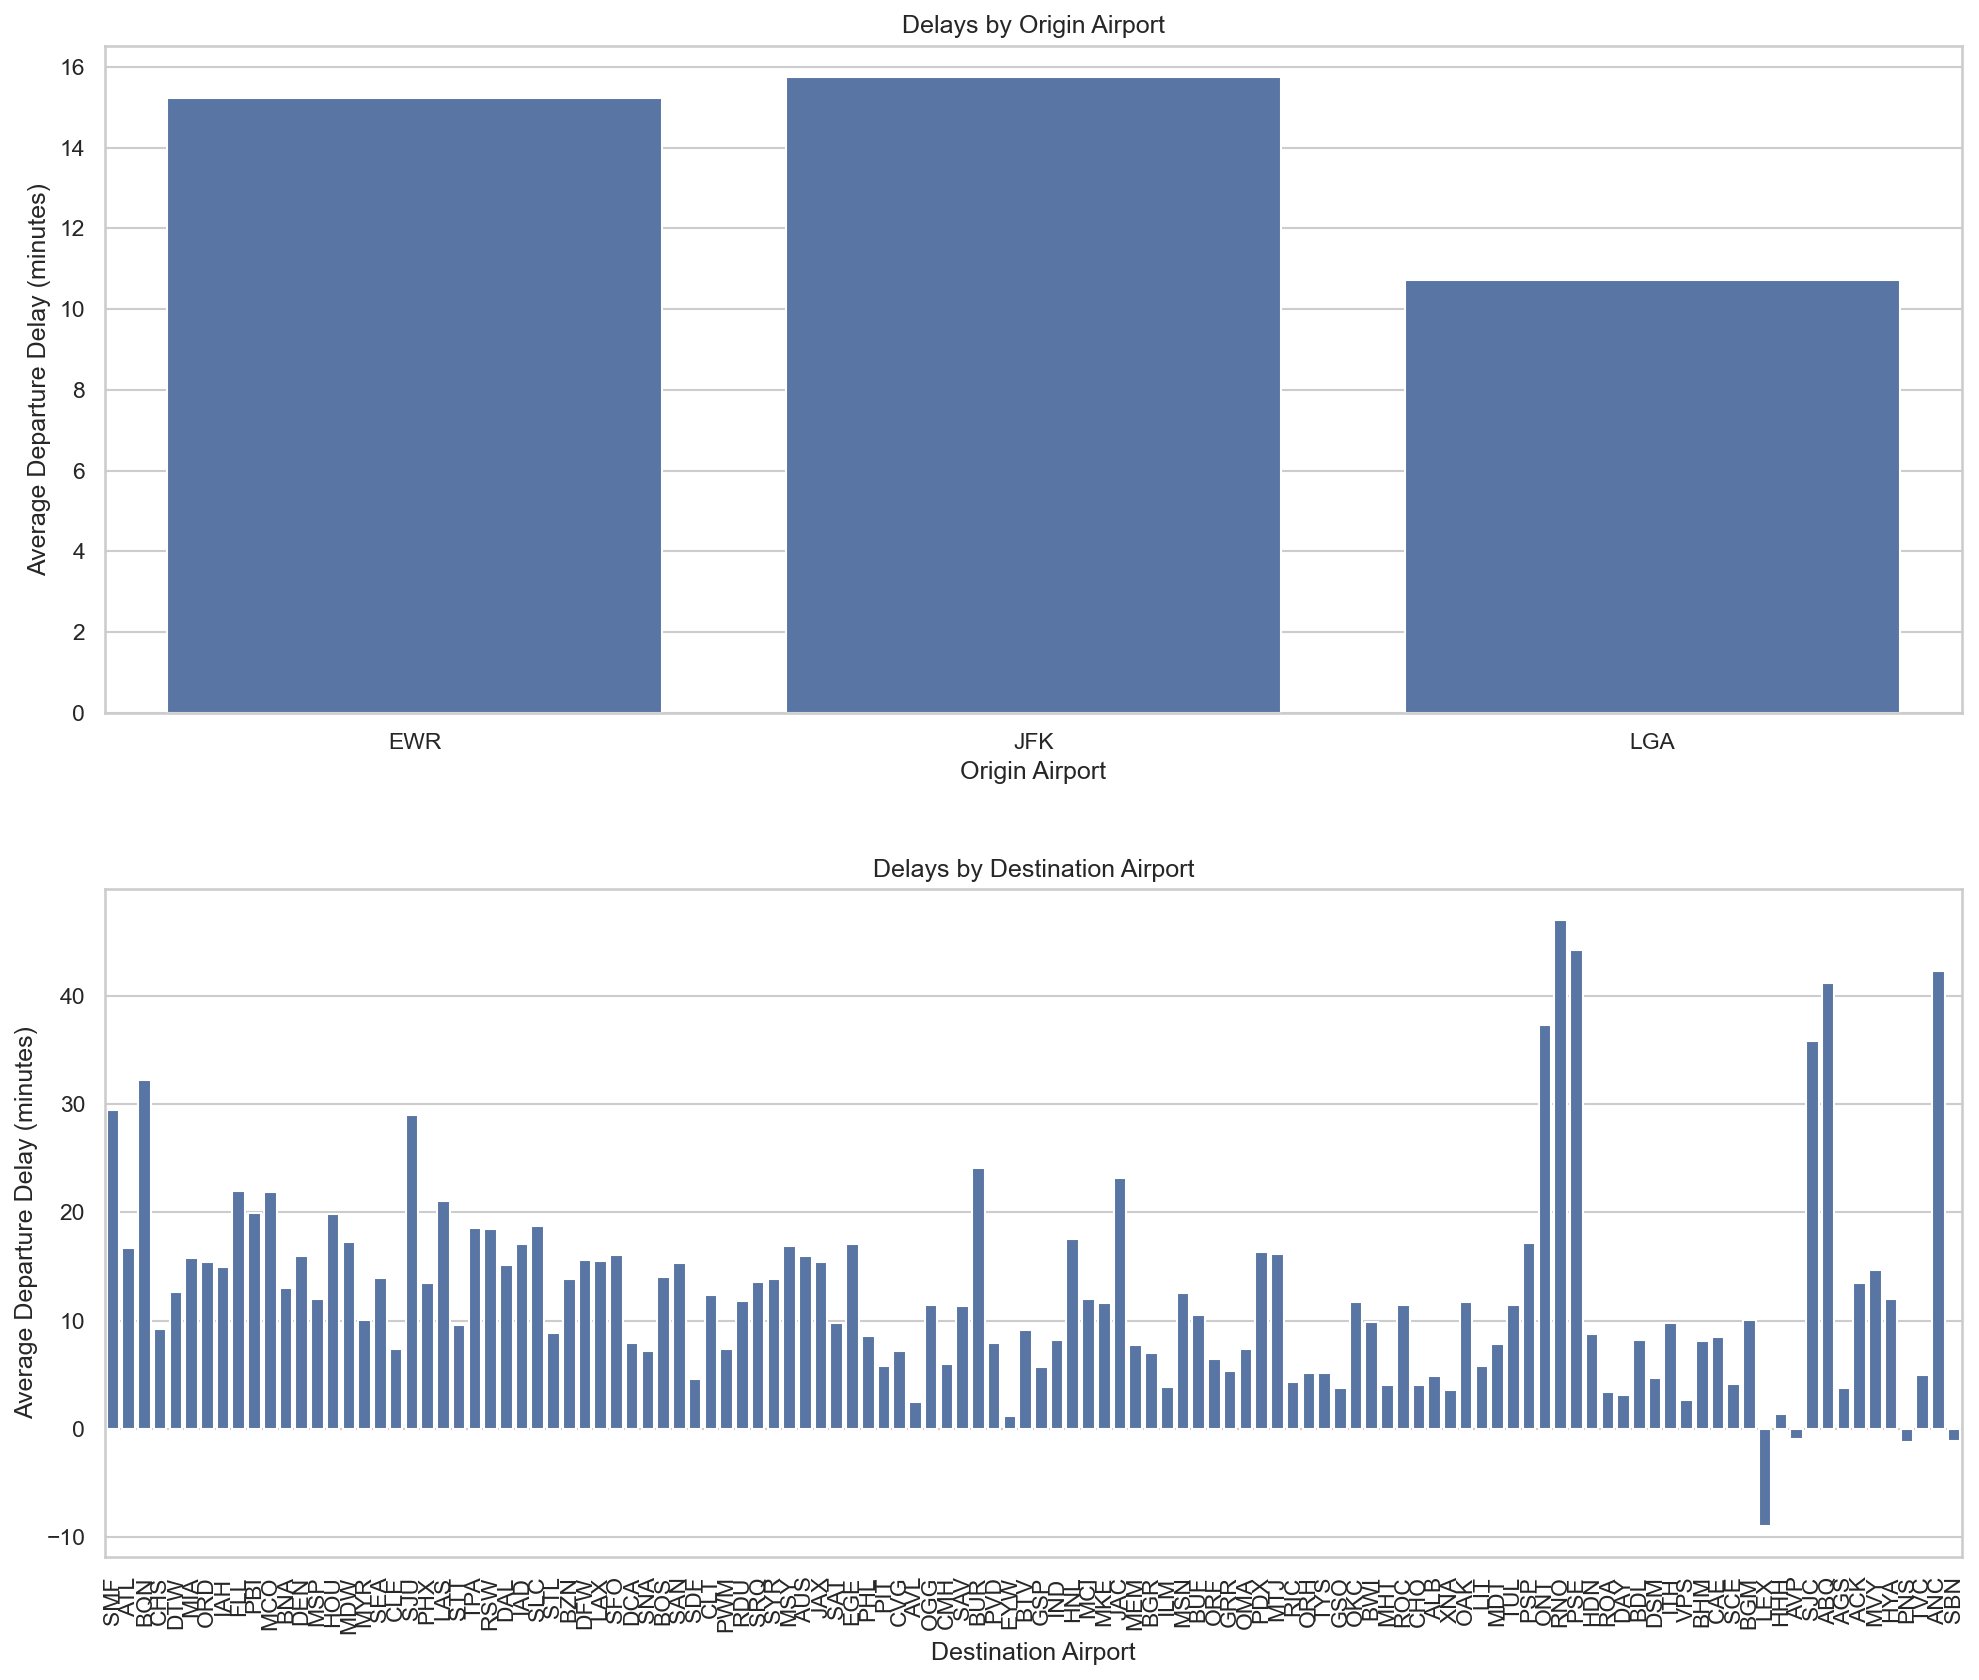

In [59]:
# Group delays by origin and destination airports
plt.figure(figsize=(14, 12))

# Delays by origin airport
plt.subplot(2, 1, 1)
sns.barplot(x='origin', y='dep_delay', data=merged_final, ci=None)
plt.title('Delays by Origin Airport')
plt.xlabel('Origin Airport')
plt.ylabel('Average Departure Delay (minutes)')

# Delays by destination airport with rotated labels
plt.subplot(2, 1, 2)
sns.barplot(x='dest', y='dep_delay', data=merged_final, ci=None)
plt.title('Delays by Destination Airport')
plt.xlabel('Destination Airport')
plt.ylabel('Average Departure Delay (minutes)')
plt.xticks(rotation=90)  # Rotate labels for better visibility

plt.tight_layout(pad=3)  # Adjust spacing between subplots
plt.show()


### Analysis of Delays by Origin and Destination Airports

- **Delays by Origin Airport**:
  - The average departure delay is highest for JFK and EWR airports, while LGA has a noticeably lower average delay.
  - This suggests that operational or traffic-related factors may differ across these airports, impacting delay patterns.

- **Delays by Destination Airport**:
  - There is considerable variability in average delays across different destination airports.
  - Some destinations experience significantly higher delays, while others report minimal or negative average delays.
  - Further analysis might be needed to understand if these variations are influenced by distance, weather conditions, or operational efficiency.

### Insights:
- Airports with higher traffic or operational constraints (e.g., JFK) tend to show higher average delays.
- Understanding the relationship between airport-specific characteristics and delay patterns could aid in resource optimization and delay reduction strategies.

Delays vs Airline Features (carrier, manufacturer)


Code for Grouping Delays by Carrier and Manufacturer

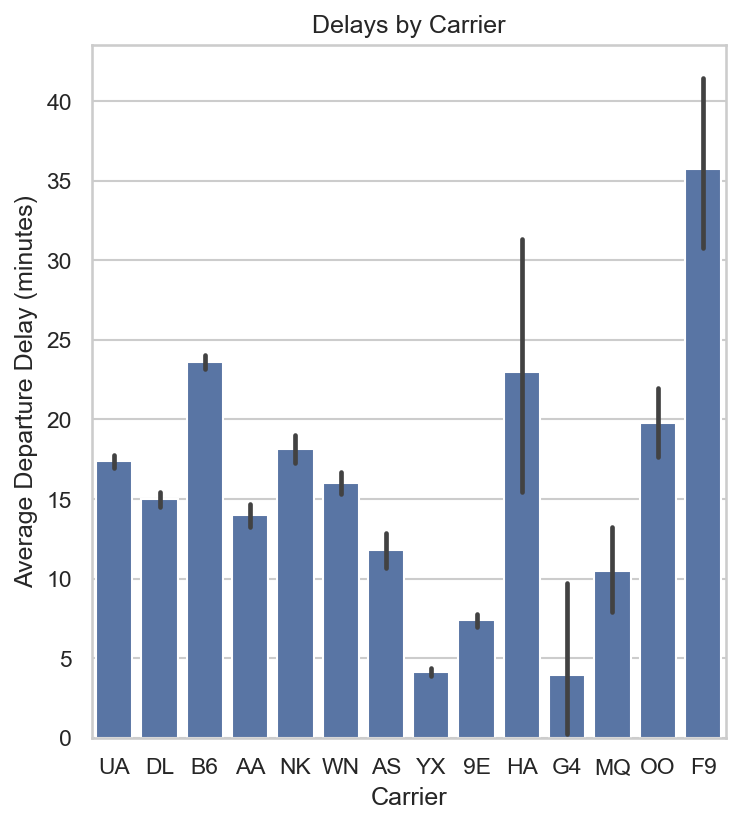

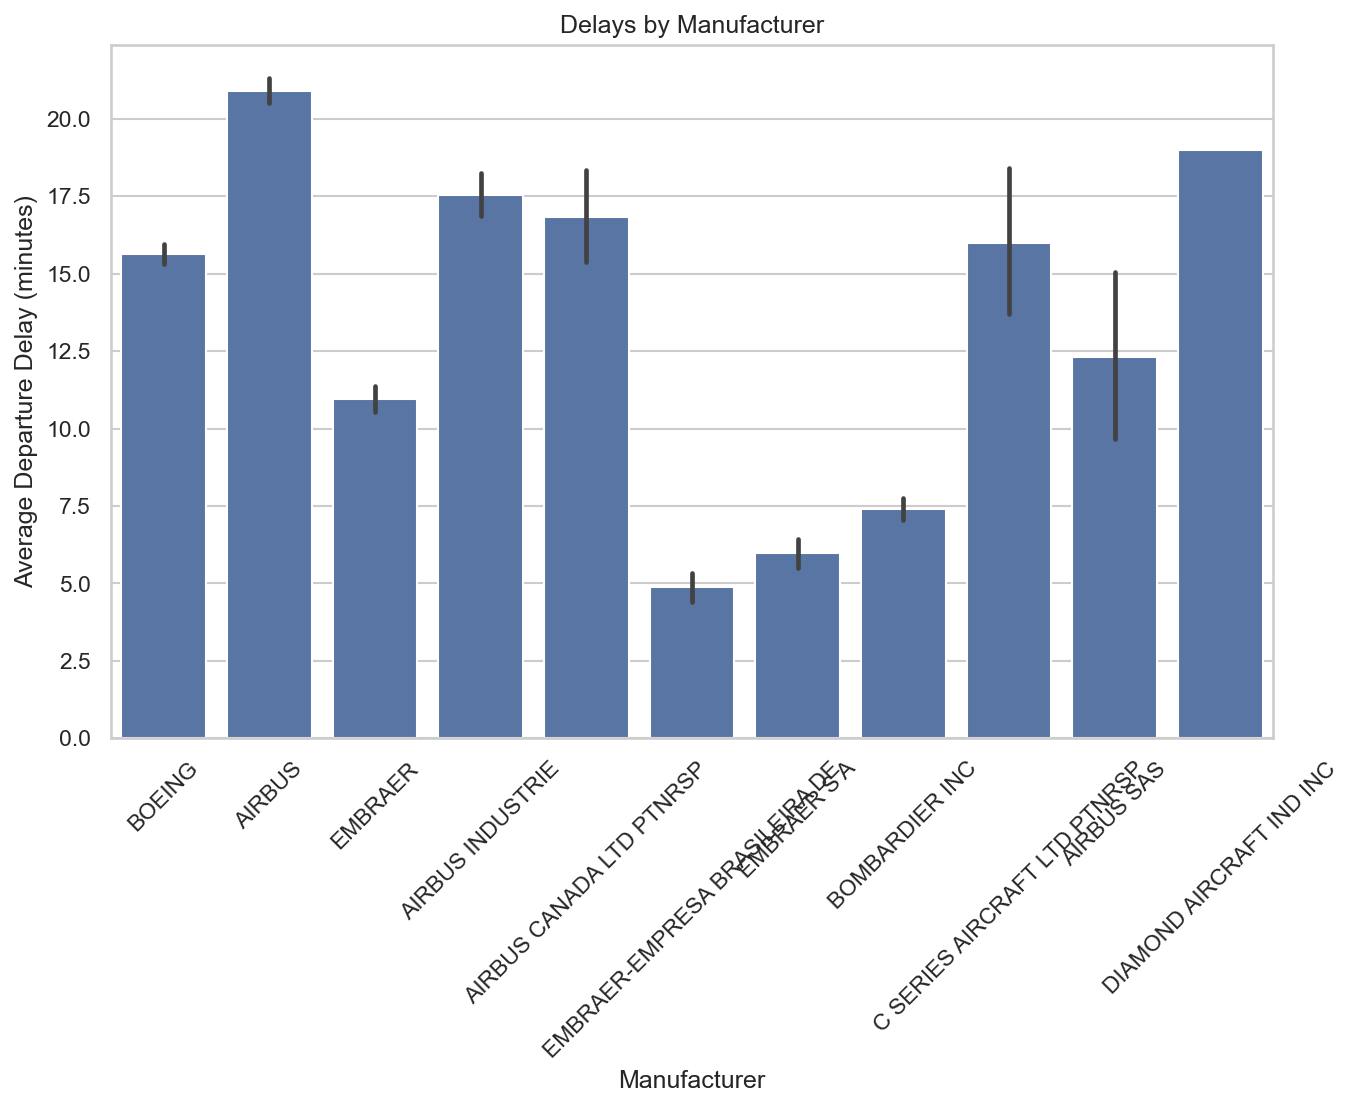

<Figure size 1500x900 with 0 Axes>

In [60]:
# Group delays by carrier and manufacturer
plt.figure(figsize=(12, 6))

# Delays by carrier
plt.subplot(1, 2, 1)
sns.barplot(x='carrier', y='dep_delay', data=merged_final)
plt.title('Delays by Carrier')
plt.xlabel('Carrier')
plt.ylabel('Average Departure Delay (minutes)')


# Plot Delays by Manufacturer
plt.figure(figsize=(10, 6))
sns.barplot(x='manufacturer', y='dep_delay', data=merged_final)
plt.title('Delays by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Average Departure Delay (minutes)')
plt.xticks(rotation=45)
plt.show()


plt.tight_layout()
plt.show()




## Analysis of Delays by Carrier and Manufacturer

### Delays by Carrier
- **Figure 1:** Highlights the average departure delays for each carrier.
  - Significant variation exists between carriers, with some exhibiting much higher average delays.
  - Carriers like `F9` and `HA` show the highest average delays, while others such as `YX` maintain relatively low delays.

### Delays by Manufacturer
- **Figure 2:** Displays average departure delays grouped by aircraft manufacturers.
  - Manufacturers such as **Airbus** and **Boeing** show higher average delays compared to others.
  - Some smaller manufacturers, like **Diamond Aircraft Ind Inc**, also exhibit relatively high delays but could be due to limited data points.
  - These insights may reflect operational practices, aircraft reliability, or usage patterns.

These analyses underscore the importance of understanding carrier and aircraft-specific factors when addressing flight delays.

--- 

Delays vs Distance and Air Time


Code for Scatter Plots of Delays vs Distance and Air Time

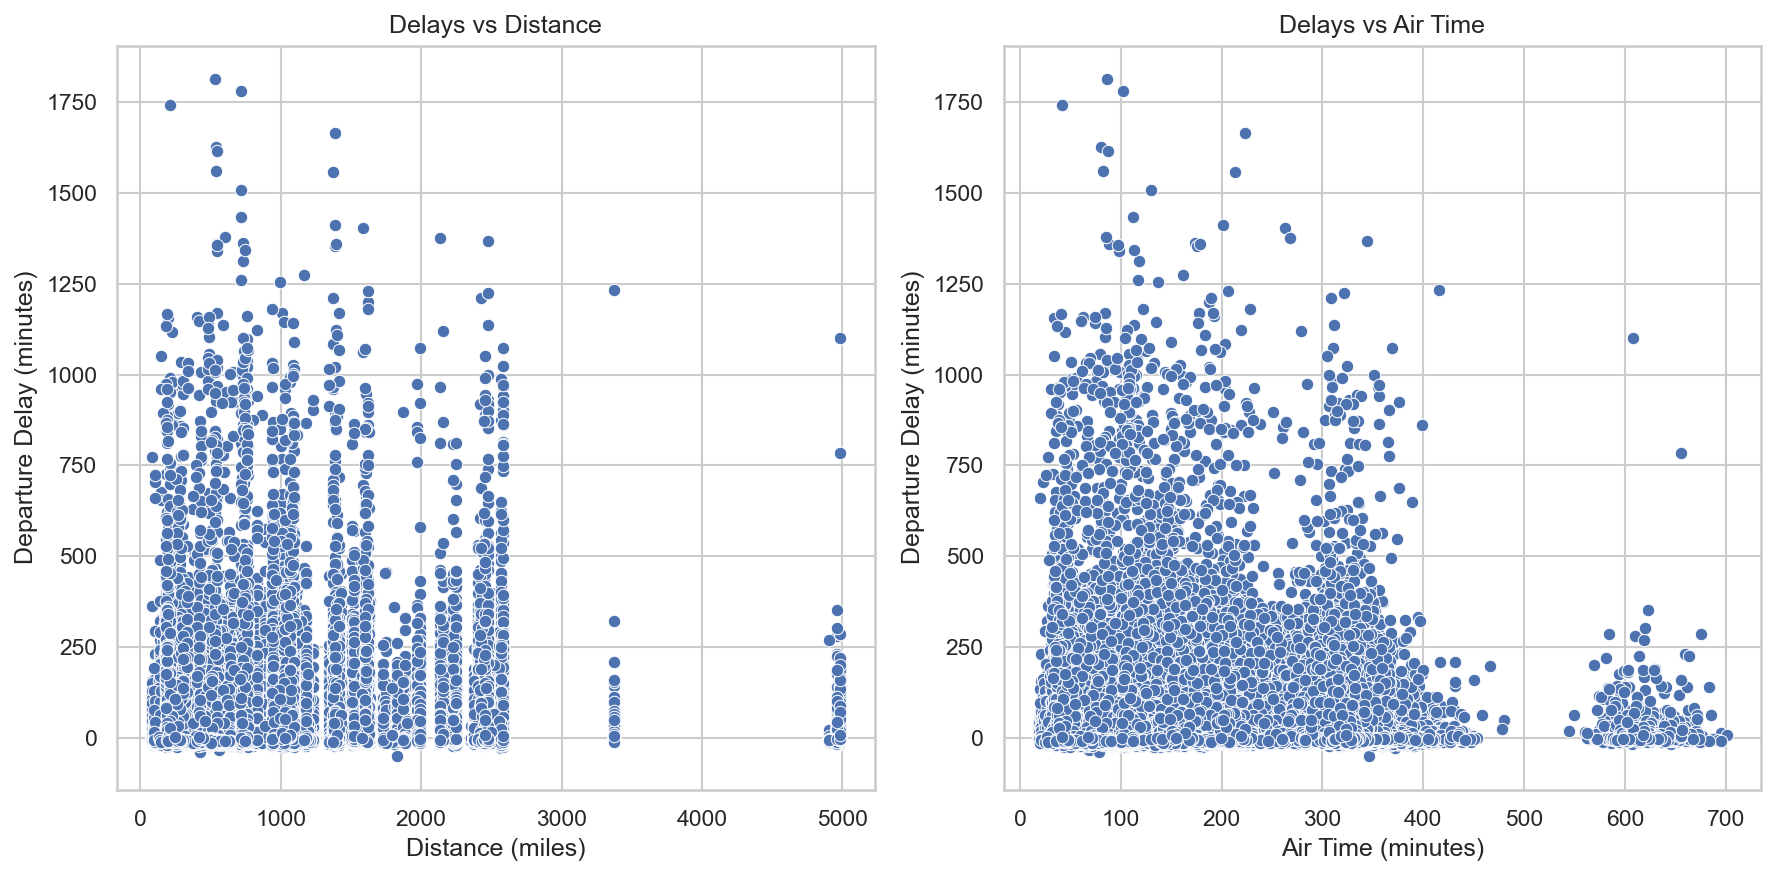

In [61]:
# Scatter plots for delays vs distance and air time
plt.figure(figsize=(12, 6))

# Delays vs Distance
plt.subplot(1, 2, 1)
sns.scatterplot(x=merged_final['distance'], y=merged_final['dep_delay'])
plt.title('Delays vs Distance')
plt.xlabel('Distance (miles)')
plt.ylabel('Departure Delay (minutes)')

# Delays vs Air Time
plt.subplot(1, 2, 2)
sns.scatterplot(x=merged_final['air_time'], y=merged_final['dep_delay'])
plt.title('Delays vs Air Time')
plt.xlabel('Air Time (minutes)')
plt.ylabel('Departure Delay (minutes)')

plt.tight_layout()
plt.show()


---

## Scatter Plots: Departure Delays vs Distance and Air Time

### Delays vs Distance
- **Figure 1:** The scatter plot examines the relationship between departure delays and flight distances.
  - No strong trend is visible; delays appear scattered across various distances.
  - Some extreme delays are present for both short and long-distance flights.

### Delays vs Air Time
- **Figure 2:** This scatter plot explores how delays correlate with air time.
  - Similar to distance, delays are distributed broadly without a clear trend.
  - Flights with longer air times generally seem to have a wider range of delays.

These observations suggest that neither distance nor air time alone strongly predicts departure delays, emphasizing the need to consider other factors in delay analysis.

---

# 3. Multivariate Analysis
The objective is to examine interactions between multiple features and their combined impact on delays.

Correlation Matrix
Code for Correlation Matrix Heatmap

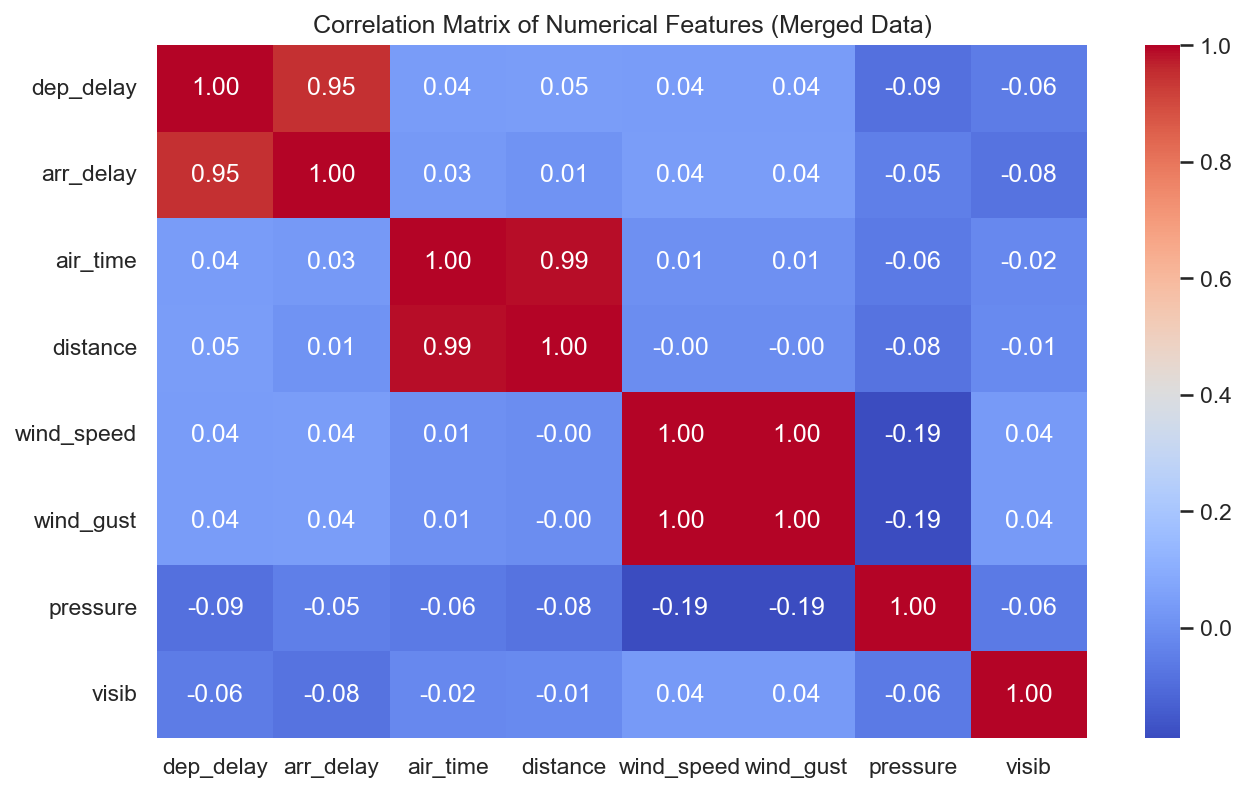

In [62]:
# List of numerical features from both datasets
corr_features = ['dep_delay', 'arr_delay', 'air_time', 'distance', 'wind_speed','wind_gust','pressure','visib']

# Compute the correlation matrix
corr_matrix = merged_final[corr_features].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features (Merged Data)')
plt.show()


---

## Correlation Matrix of Numerical Features (Merged Data)

### Key Insights:
- **High Correlation:**
  - `dep_delay` and `arr_delay` exhibit a strong positive correlation (0.95), indicating that delays at departure often translate to delays upon arrival.
  - `air_time` and `distance` are highly correlated (0.99), which is expected since longer distances naturally lead to longer air times.

- **Low Correlation:**
  - Variables like `wind_speed` show negligible correlation with delays (`dep_delay` and `arr_delay`), suggesting minimal impact of wind speed on delays.

This analysis highlights relationships among numerical features, particularly the interconnectedness of delays and travel time/distance, which are vital for predictive modeling.

---

**Flight Delays by Time, Carrier, and Airport**

Code for Grouped Bar Charts

Index(['year', 'month', 'day', 'dep_time', 'sched_dep_time', 'dep_delay',
       'arr_time', 'sched_arr_time', 'arr_delay', 'carrier', 'flight',
       'tailnum', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute',
       'time_hour', 'name', 'year_planes', 'type', 'manufacturer', 'model',
       'engines', 'seats', 'speed', 'engine', 'temp', 'dewp', 'humid',
       'wind_dir', 'wind_speed', 'wind_gust', 'precip', 'pressure', 'visib',
       'time_hour_weather', 'faa', 'name_airports', 'lat', 'lon', 'alt', 'tz',
       'dst', 'tzone'],
      dtype='object')


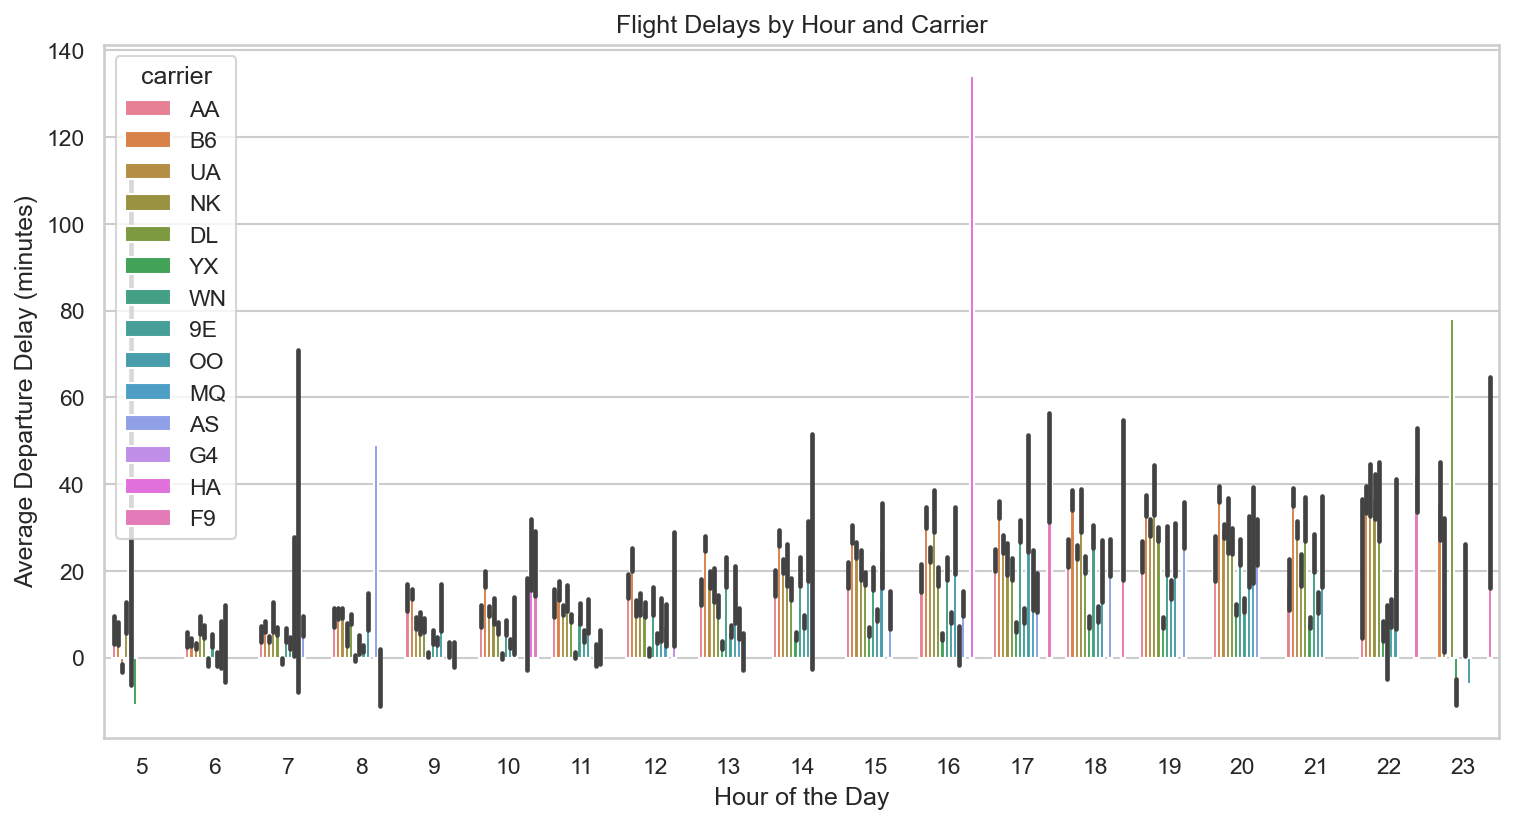

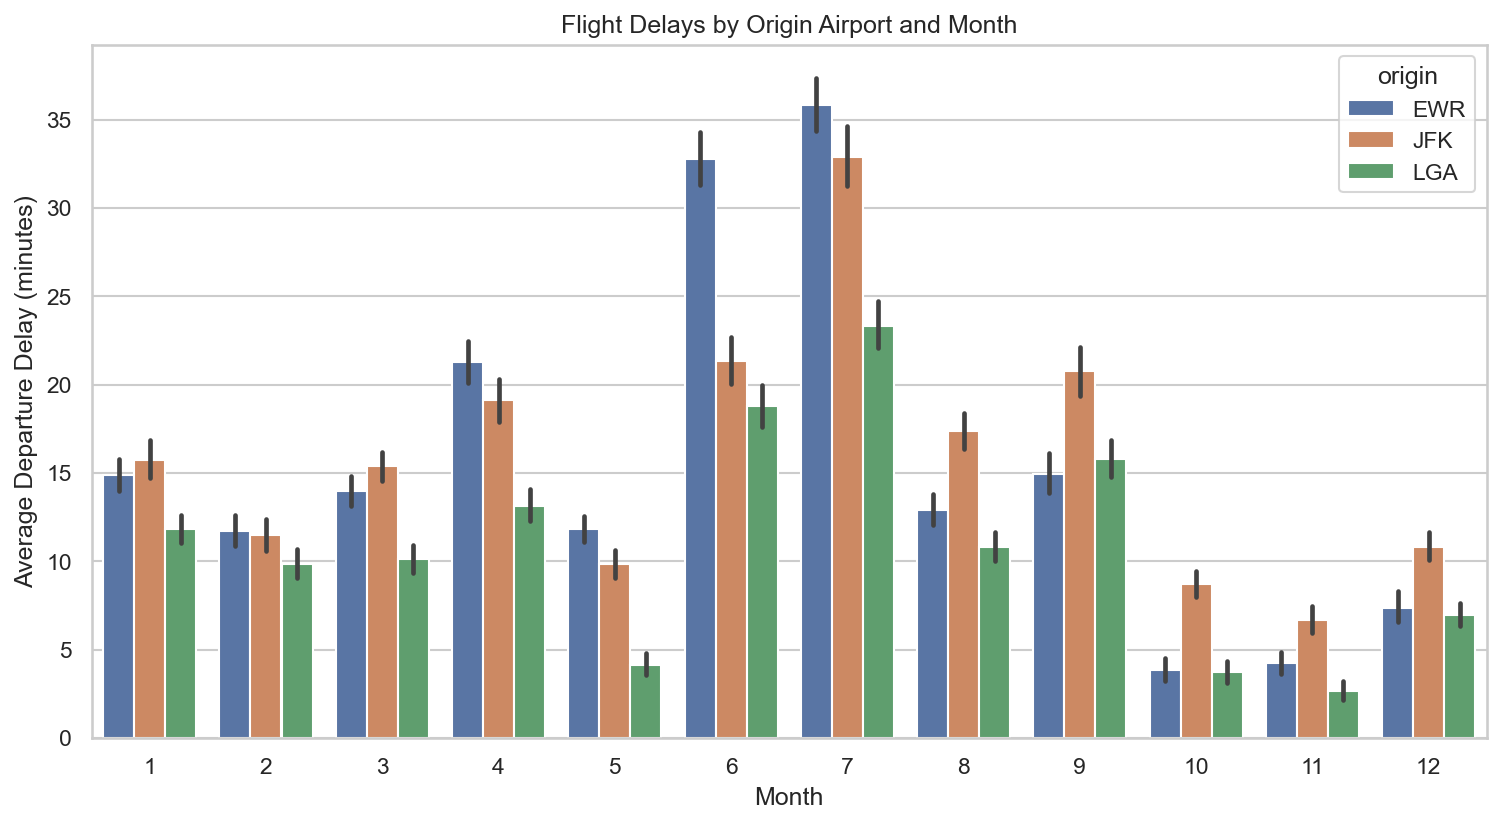

In [63]:
print(merged_final.columns)

# Delays by Hour and Carrier using 'flights_hour' and 'flights_carrier'
plt.figure(figsize=(12, 6))
sns.barplot(x='hour', y='dep_delay', hue='carrier', data=merged_final)
plt.title('Flight Delays by Hour and Carrier')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Departure Delay (minutes)')
plt.show()

# Delays by Origin Airport and Month using 'flights_month'
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='dep_delay', hue='origin', data=merged_final)
plt.title('Flight Delays by Origin Airport and Month')
plt.xlabel('Month')
plt.ylabel('Average Departure Delay (minutes)')
plt.show()


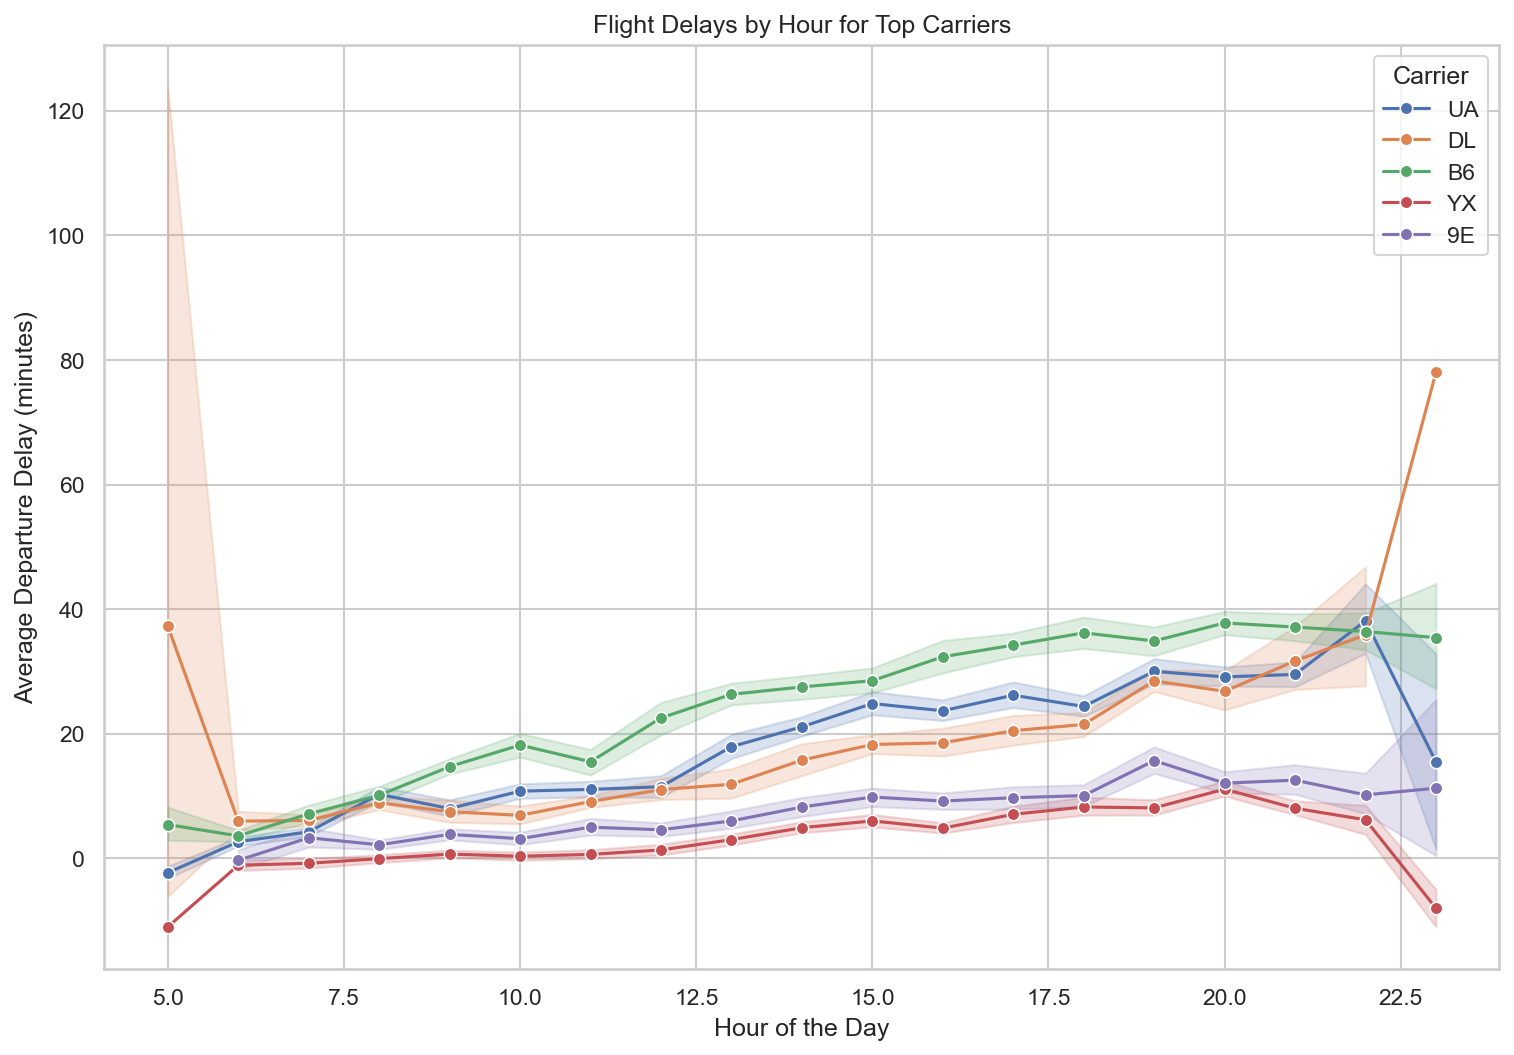

In [64]:
# Flight Delays by Hour for Key Carriers
key_carriers = merged_final['carrier'].value_counts().head(5).index.tolist()  # Top 5 carriers
filtered_data = merged_final[merged_final['carrier'].isin(key_carriers)]

plt.figure(figsize=(12, 8))

# Line plot to show trends for top carriers
sns.lineplot(x='hour', y='dep_delay', hue='carrier', data=filtered_data, marker='o')
plt.title('Flight Delays by Hour for Top Carriers')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Departure Delay (minutes)')
plt.legend(title='Carrier', loc='upper right')
plt.grid(True)
plt.show()


### Flight Delays by Hour and Carrier

The first figure analyzes the flight delays across different hours of the day for various carriers. The clustered view arises from showing all carriers together in a single bar plot. 

#### Observations:
- While it effectively represents all carriers, the density of the data makes it harder to discern clear trends.
- The plot shows variability in delays based on the time of day, with noticeable peaks for certain carriers.

### Improvements for Clarity

The revised figure focuses on the **top 5 carriers** with the highest activity and uses a **line plot** to display trends. This method:
- Reduces clustering by focusing on fewer carriers.
- Presents trends clearly with a line plot and markers.
- Highlights variability over time for the most relevant carriers.

#### Observations:
- The delays vary significantly between carriers during peak hours.
- Clear patterns can now be observed, such as consistent peaks during specific hours for certain carriers.

### Flight Delays by Origin Airport and Month

The second figure illustrates the relationship between delays, origin airports, and months. It uses grouped bar plots, showing:
- Delays are highest during the summer months (June to August), likely due to increased air traffic.
- JFK airport consistently experiences higher delays compared to EWR and LGA across most months. 

#### Observations:
- The plot effectively highlights seasonal and location-specific trends.
- The monthly grouping provides a clear understanding of delay patterns for the three major airports.

---

## Overall Correlation

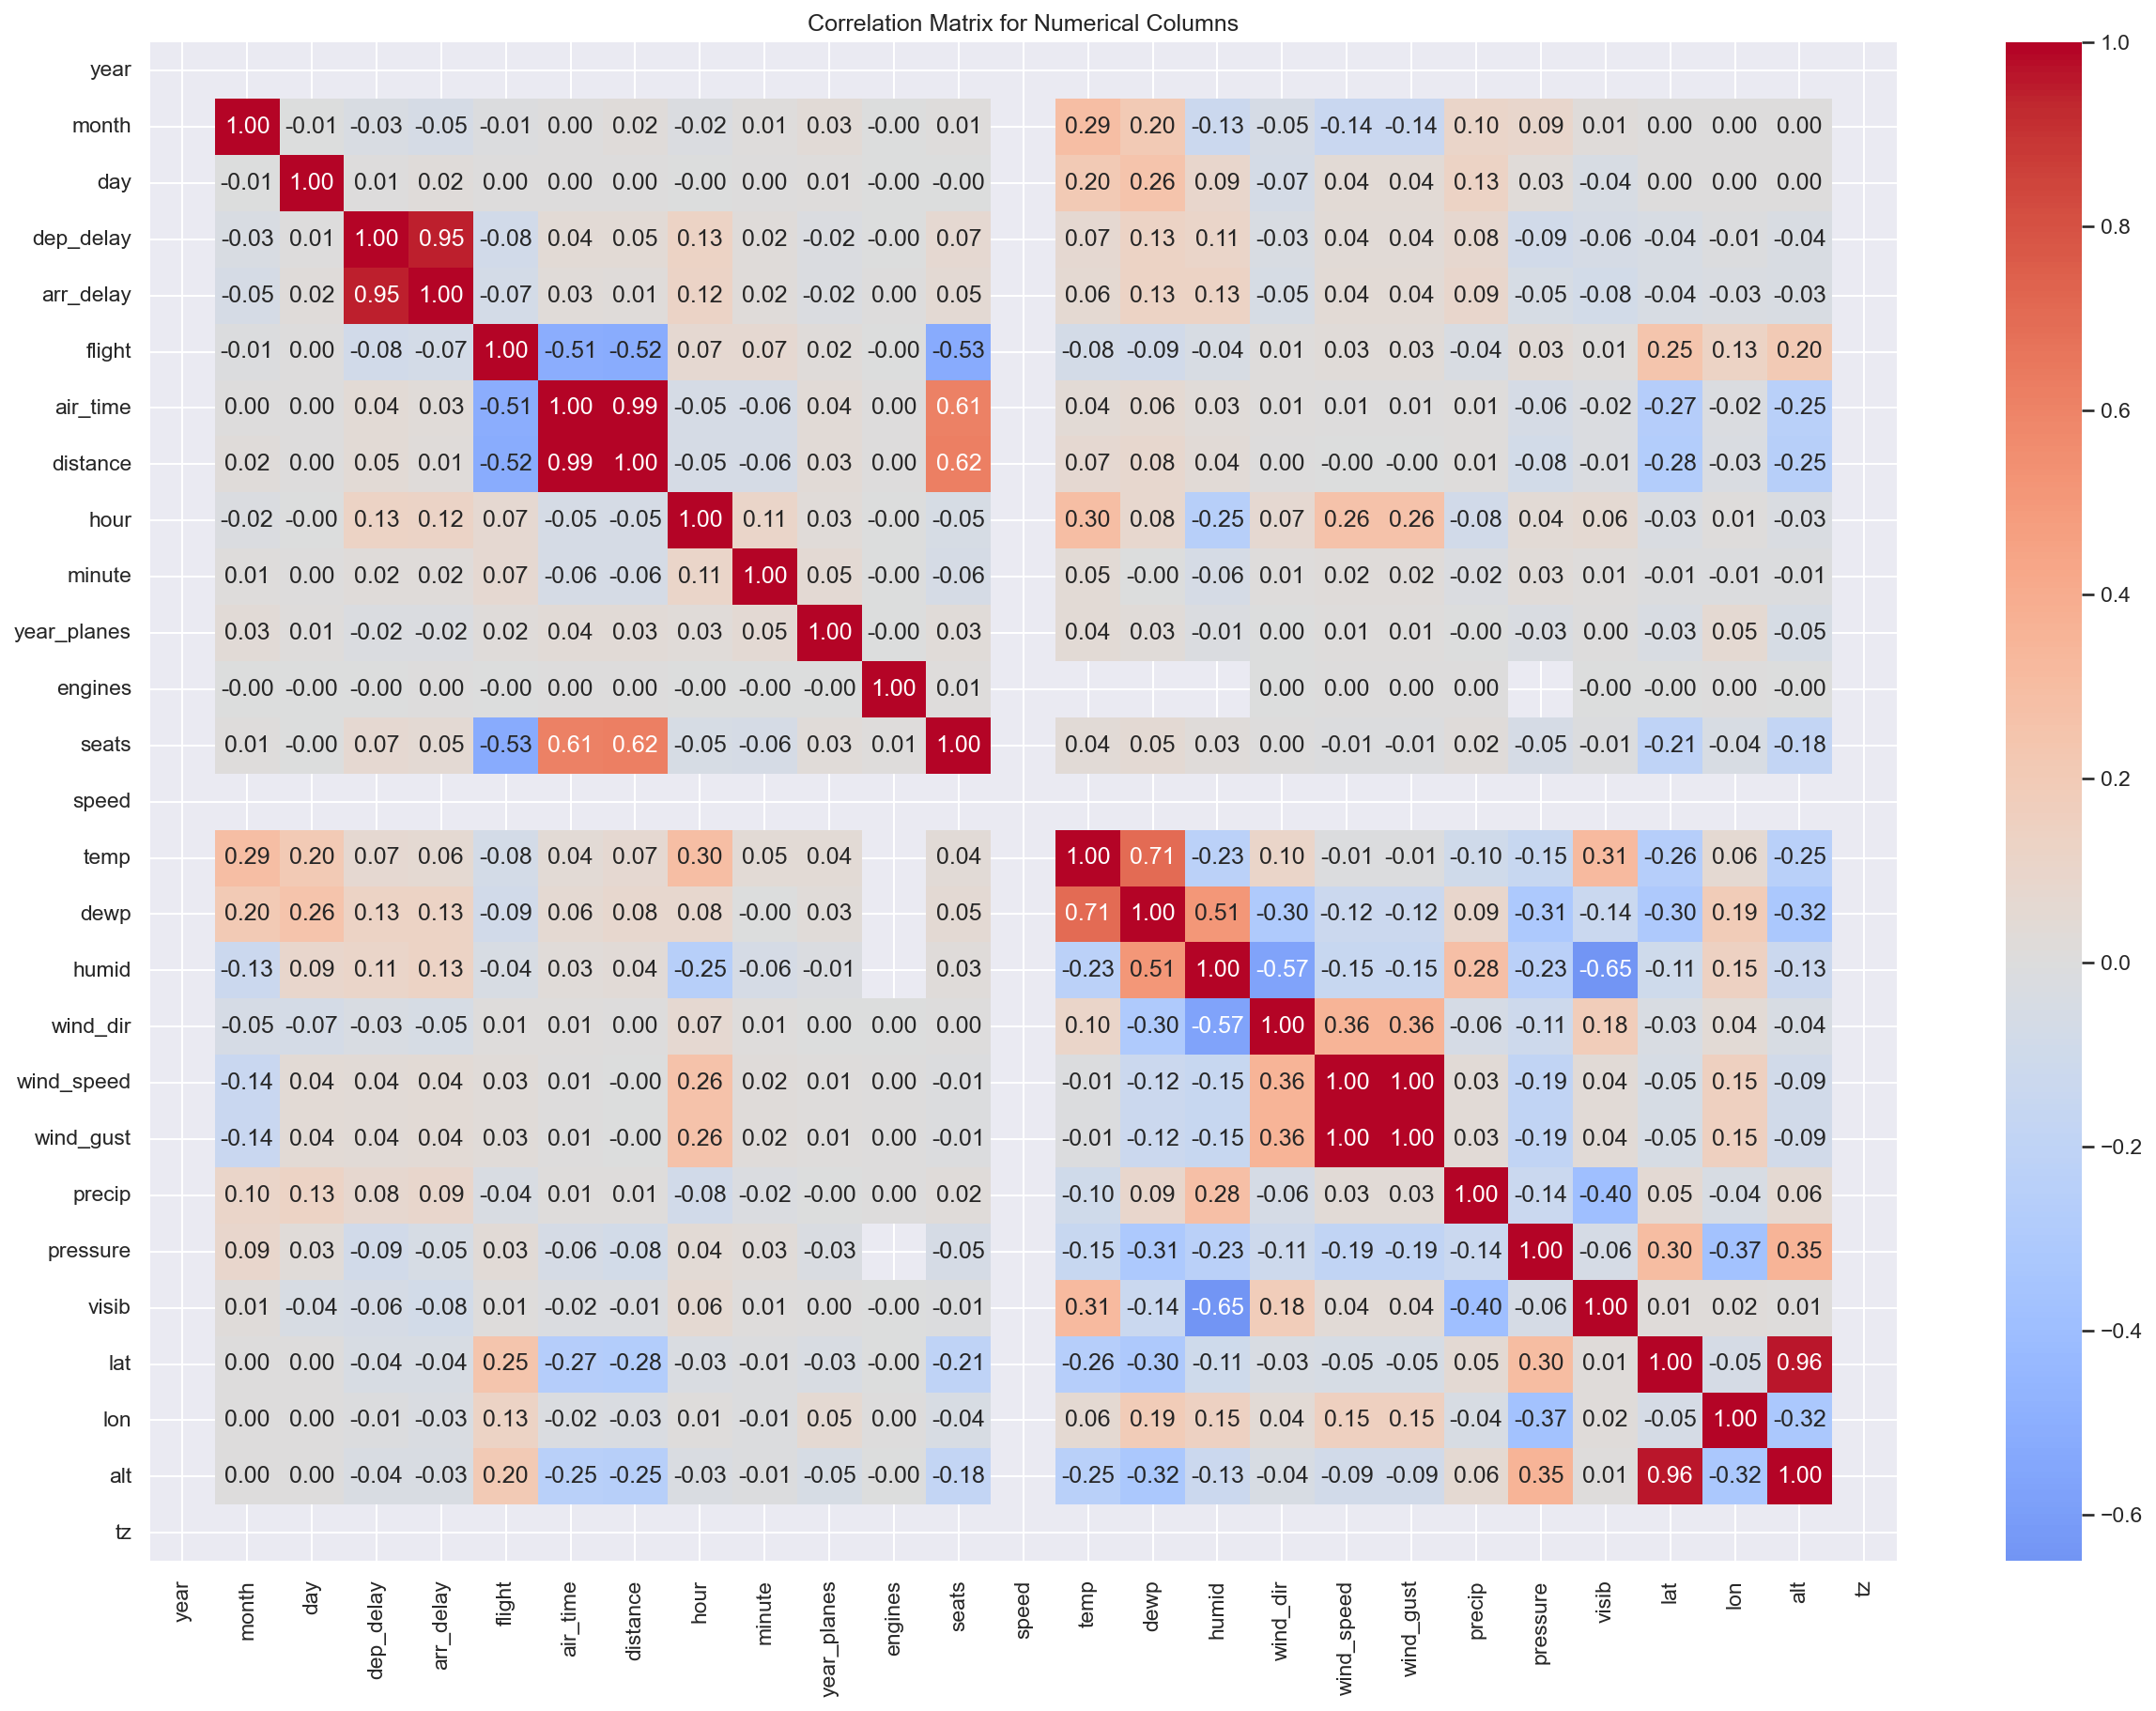

In [65]:
# Set plot style
sns.set(style="darkgrid")

# Select numeric columns dynamically
numerical_columns = merged_final.select_dtypes(include=[np.number]).columns.tolist()

# Correlation Matrix for numerical columns
plt.figure(figsize=(20, 14))
numerical_data = merged_final[numerical_columns]
sns.heatmap(numerical_data.corr(), annot=True, cmap="coolwarm", fmt=".2f", center=0.00)
plt.title("Correlation Matrix for Numerical Columns")
plt.show()

## **Step 7: Data Cleaning**


#### 1. **Drop Columns or Rows with a High Percentage of Missing Data**:

If a column has more than 50% missing values, we can drop it.



In [66]:
# Drop columns with more than 50% missing values in both datasets
columns_to_drop = merged_final.columns[merged_final.isnull().mean() > 0.8]
final_cleaned = merged_final.drop(columns=columns_to_drop)



In [67]:
final_cleaned.shape
final_cleaned.isnull().sum()

year                     0
month                    0
day                      0
dep_time                 0
sched_dep_time           0
dep_delay                0
arr_time                 0
sched_arr_time           0
arr_delay                0
carrier                  0
flight                   0
tailnum                  0
origin                   0
dest                     0
air_time                 0
distance                 0
hour                     0
minute                   0
time_hour                0
name                     0
year_planes          16800
type                 16800
manufacturer         16800
model                16800
engines              16800
seats                16800
speed                16800
engine               16800
wind_dir             20660
wind_speed           17663
wind_gust            17663
visib                 1330
time_hour_weather      825
faa                      0
name_airports            0
lat                      0
lon                      0
a


#### 2. **Fill Missing Data with Mean, Median, or Mode**:

For numerical columns, we can fill missing data with the median (to handle skewed distributions). For categorical columns, we can fill missing values with the mode.



In [68]:
# Fill missing values for numerical columns with median
numerical_columns = final_cleaned.select_dtypes(include=np.number).columns
for col in numerical_columns:
    final_cleaned[col].fillna(final_cleaned[col].median(), inplace=True)

# Fill missing categorical 'time_hour_weather' with the most frequent value (mode)
final_cleaned['time_hour_weather'].fillna(final_cleaned['time_hour_weather'].mode()[0], inplace=True)

# Confirm missing values are handled
remaining_missing_post_fill = final_cleaned.isnull().sum()

remaining_missing_post_fill


year                     0
month                    0
day                      0
dep_time                 0
sched_dep_time           0
dep_delay                0
arr_time                 0
sched_arr_time           0
arr_delay                0
carrier                  0
flight                   0
tailnum                  0
origin                   0
dest                     0
air_time                 0
distance                 0
hour                     0
minute                   0
time_hour                0
name                     0
year_planes              0
type                 16800
manufacturer         16800
model                16800
engines                  0
seats                    0
speed                    0
engine               16800
wind_dir                 0
wind_speed               0
wind_gust                0
visib                    0
time_hour_weather        0
faa                      0
name_airports            0
lat                      0
lon                      0
a

### **Data Preprocessing: Encoding and Handling Categorical Features**

In this step, I transformed and handled categorical features in the `final_cleaned` dataset to prepare it for modeling.

#### Process:

1. **Identify Categorical Columns**:
   - I identified the categorical columns in the dataset using `select_dtypes(include=['object'])`.

2. **Analyze Unique Categories and Distribution**:
   - I checked the number of unique categories and their distribution for each categorical feature to understand their variability.

3. **One-Hot Encoding**:
   - Applied label to the `object` dtype columns.

4. **Verify Transformation**:
   - I confirmed the transformations by printing the first few rows of the dataset and ensuring no categorical columns remain.

#### Outcome:
The categorical features are now fully encoded and prepared for machine learning models.

In [69]:
from sklearn.preprocessing import LabelEncoder

# Identify categorical columns
categorical_columns = final_cleaned.select_dtypes(include=['object']).columns

# Apply Label Encoding
label_encoder = LabelEncoder()
for col in categorical_columns:
    final_cleaned[col] = label_encoder.fit_transform(final_cleaned[col])

# Confirm encoding
final_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 422818 entries, 0 to 422817
Data columns (total 41 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   year               422818 non-null  Int64  
 1   month              422818 non-null  int64  
 2   day                422818 non-null  int64  
 3   dep_time           422818 non-null  int64  
 4   sched_dep_time     422818 non-null  int64  
 5   dep_delay          422818 non-null  float64
 6   arr_time           422818 non-null  int64  
 7   sched_arr_time     422818 non-null  int64  
 8   arr_delay          422818 non-null  float64
 9   carrier            422818 non-null  int64  
 10  flight             422818 non-null  int64  
 11  tailnum            422818 non-null  int64  
 12  origin             422818 non-null  int64  
 13  dest               422818 non-null  int64  
 14  air_time           422818 non-null  float64
 15  distance           422818 non-null  int64  
 16  ho

### **Data Preprocessing: Dropping Rows with Missing Values**

In this step, I removed rows containing any missing values from the `merged_data` dataset to create a clean and complete dataset for modeling.

#### Purpose:
- Ensures that no missing data impacts model performance.
- Simplifies preprocessing by avoiding imputation for the remaining null values.

#### Process:
1. **Drop Missing Values**:
   - Used `dropna()` to remove rows with missing values from the dataset.

2. **Check Row Counts**:
   - Compared the number of rows before and after dropping nulls to understand the extent of data loss.

#### Output:
- The dataset `final_cleaned` now contains only complete rows, ready for further preprocessing or analysis. The printed row counts verify the number of rows retained after dropping null values.

In [70]:
final_cleaned = final_cleaned.drop(columns=['type','manufacturer','model','engine'])

## **Step 9: Data Exploration: Correlation Analysis of Numerical Features**

In this step, I calculated the correlation matrix for numerical features in the `final_data` dataset, focusing on the relationships involving `dep_delay` and `arr_delay`.

#### Purpose:
- To identify features strongly correlated with departure and arrival delays, which can guide feature selection and model improvement.

#### Process:
1. **Select Numerical Features**:
   - Filtered the dataset to include only numeric columns using `select_dtypes(include=['number'])`.

2. **Calculate Correlation Matrix**:
   - Computed the correlation matrix to measure the strength and direction of relationships between numerical features.

3. **Focus on Delays**:
   - Extracted and sorted correlations for `dep_delay` and `arr_delay`, highlighting features most relevant to delay prediction.

#### Outcome:
- The correlation matrix reveals key features strongly linked to delays, providing valuable insights for feature selection in machine learning models. This analysis ensures the focus remains on impactful variables.

In [71]:
# Select only numeric columns
numeric_data = final_cleaned.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Focus on 'dep_delay' and 'arr_delay' correlations
print(corr_matrix[['dep_delay', 'arr_delay']].sort_values(by='arr_delay', ascending=False))



                   dep_delay  arr_delay
arr_delay           0.948369   1.000000
dep_delay           1.000000   0.948369
dep_time            0.148476   0.144929
hour                0.129373   0.122243
sched_dep_time      0.129358   0.122200
sched_arr_time      0.101917   0.094889
seats               0.067633   0.050828
wind_gust           0.038362   0.043221
wind_speed          0.038362   0.043221
name                0.022162   0.039096
air_time            0.041042   0.032345
minute              0.017815   0.016205
day                 0.006058   0.015645
distance            0.045403   0.014509
tailnum             0.012755   0.012837
name_airports      -0.003230   0.010629
engines            -0.000217   0.001259
dest                0.010378   0.000145
carrier            -0.034444  -0.023320
year_planes        -0.019692  -0.023386
lon                -0.009802  -0.025341
alt                -0.036313  -0.034356
lat                -0.041022  -0.043351
arr_time           -0.047360  -0.043816


## **Step 10: Feature Selection for Modeling**

In this step, I selected features for the prediction of `arr_delay` based on prior correlation analysis and domain insights.

#### Process:
1. **Target Variable**:
   - Defined `arr_delay` as the target variable for modeling.

2. **Selected Features**:
   - All numerical variables

3. **Dataset Creation**:
   - Created `X` (features) and `y` (target) datasets for machine learning modeling.



In [72]:
from sklearn.preprocessing import StandardScaler

import pandas as pd

# Target variable
target = 'arr_delay'

# Features based on correlation analysis

X = final_cleaned.drop(columns=['arr_delay'], errors='ignore')  # Drop the target variable
y = final_cleaned['arr_delay']

# Display the first few rows of the dataset
print(" Features for Modeling:")
print(X.head())
print("\nTarget Variable:")
print(y.head())



 Features for Modeling:
   year  month  day  dep_time  sched_dep_time  dep_delay  arr_time  \
0  2023      1    1         0             908      203.0       207   
1  2023      1    1        17            1043       78.0       147   
2  2023      1    1        30            1056       47.0       299   
3  2023      1    1        32             970      173.0       157   
4  2023      1    1        35             918      228.0       142   

   sched_arr_time  carrier  flight  ...  visib  time_hour_weather  faa  \
0               2       11     628  ...   10.0                 15    0   
1              88        4     393  ...   10.0                 18    1   
2             169        3     371  ...   10.0                 18    1   
3            1192        3    1053  ...   10.0                 16    1   
4            1132       11     219  ...   10.0                 15    0   

   name_airports        lat        lon  alt   tz  dst  tzone  
0              2  40.692501 -74.168701   18 -5.

## **Step 10:Classification: Predicting Flight Delays**

This step involves building a classification model to predict whether a flight will be delayed by more than 15 minutes.

---

#### **1. Define Target Variable**
- A binary target variable (`y_classification`) is created:
  - **1**: Delayed (more than 15 minutes).
  - **0**: On-time.

---

#### **2. Feature Selection and Data Splitting**
- Selected features based on domain knowledge and correlation analysis
- Split the dataset into training and testing sets (80/20 split).
---

#### **3. Train Random Forest Classifier**
- Trained a **Random Forest Classifier** on the balanced dataset to handle non-linear relationships and feature interactions.

---

#### **4. Evaluate Model**
- **Classification Report**:
  - Assessed precision, recall, F1-score, and accuracy for both classes.
- **Confusion Matrix**:
  - Provided insights into true positives, true negatives, false positives, and false negatives.

---

#### **5. ROC-AUC Score and Curve**
- Calculated **ROC-AUC Score** to evaluate the model's ability to distinguish between delayed and on-time flights.
- Plotted the **ROC Curve**, showcasing the trade-off between sensitivity (recall) and specificity.

---


### Output:
- **Classification Report**:
  - Precision, recall, and F1-scores are reported for each class.
- **Confusion Matrix**:
  - Visualizes model performance on test data.
- **ROC-AUC Score and Curve**:
  - Highlights the model's effectiveness in distinguishing between classes.

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96     66996
           1       0.93      0.77      0.84     17568

    accuracy                           0.94     84564
   macro avg       0.94      0.88      0.90     84564
weighted avg       0.94      0.94      0.94     84564

Confusion Matrix:
 [[66053   943]
 [ 4027 13541]]
ROC-AUC Score: 0.98


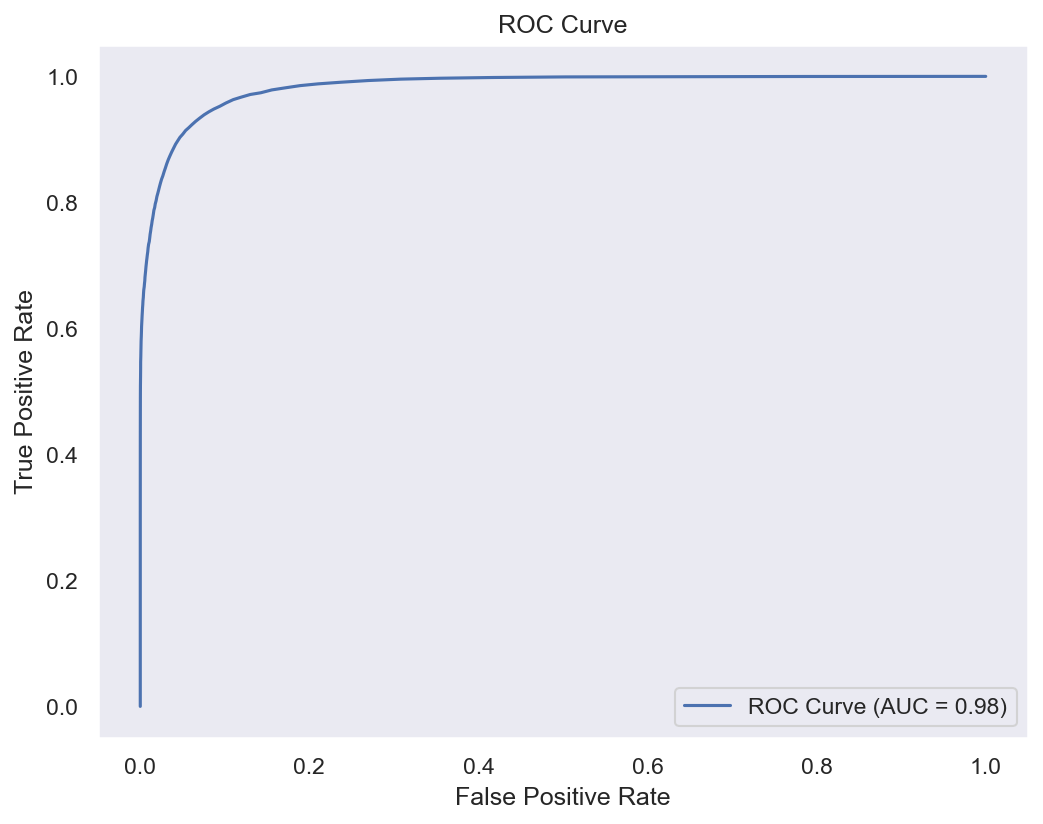

In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Step 1: Define the classification target variable
delay_threshold = 15  # Define a delay threshold in minutes
y_classification = (final_cleaned['arr_delay'] > delay_threshold).astype(int)

# Step 2: Define features and split data

X = final_cleaned.drop(columns=['arr_delay'], errors='ignore')  # Drop the target variable
y = y_classification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Step 5: Evaluate the model
y_pred = clf.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Step 6: ROC-AUC Score and Curve
y_proba = clf.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {roc_auc:.2f}")

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()




## **Step 11: Regression: Predicting Arrival Delays Using Linear Regression**

This step involves training a **Linear Regression** model to predict `arr_delay` (arrival delay) based on selected features.

---

#### **Process:**

1. **Feature Selection**:
   - Selected features (`X`) include all cleaned data

2. **Data Splitting**:
   - The dataset is split into training (80%) and testing (20%) sets to evaluate model performance.

3. **Model Training**:
   - Trained a **Linear Regression** model on the training set.

4. **Model Predictions**:
   - Made predictions (`y_pred`) on the test set using the trained model.

5. **Model Evaluation**:
   - Evaluated the model using the following metrics:
     - **Mean Absolute Error (MAE)**: Average of absolute errors.
     - **Mean Squared Error (MSE)**: Average of squared errors.
     - **R² Score**: Proportion of variance in the target variable explained by the model.

6. **Example Predictions**:
   - Compared the actual and predicted values for a sample of 5 test cases.

---

#### **Output:**
- **Performance Metrics**:
  - **MAE**: Indicates the average absolute error in prediction.
  - **MSE**: Measures the squared error, penalizing larger deviations.
  - **R² Score**: Reflects the proportion of variance explained by the model, with a value closer to 1 indicating better performance.

- **Example Predictions**:
  - A small sample of actual vs. predicted values showcases the model's accuracy on unseen data.


In [74]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

# Define features  and target 
X = final_cleaned.drop(columns=['dep_delay'], errors='ignore')  
y = final_cleaned['dep_delay']

# Split the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred = lr_model.predict(X_test)

# Evaluate the model
rmse = root_mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R²): {r2}")

Root Mean Squared Error (RMSE): 14.74163567403612
Mean Absolute Error (MAE): 10.314685370026885
R-squared (R²): 0.924203785965689


# Feature Importance plot

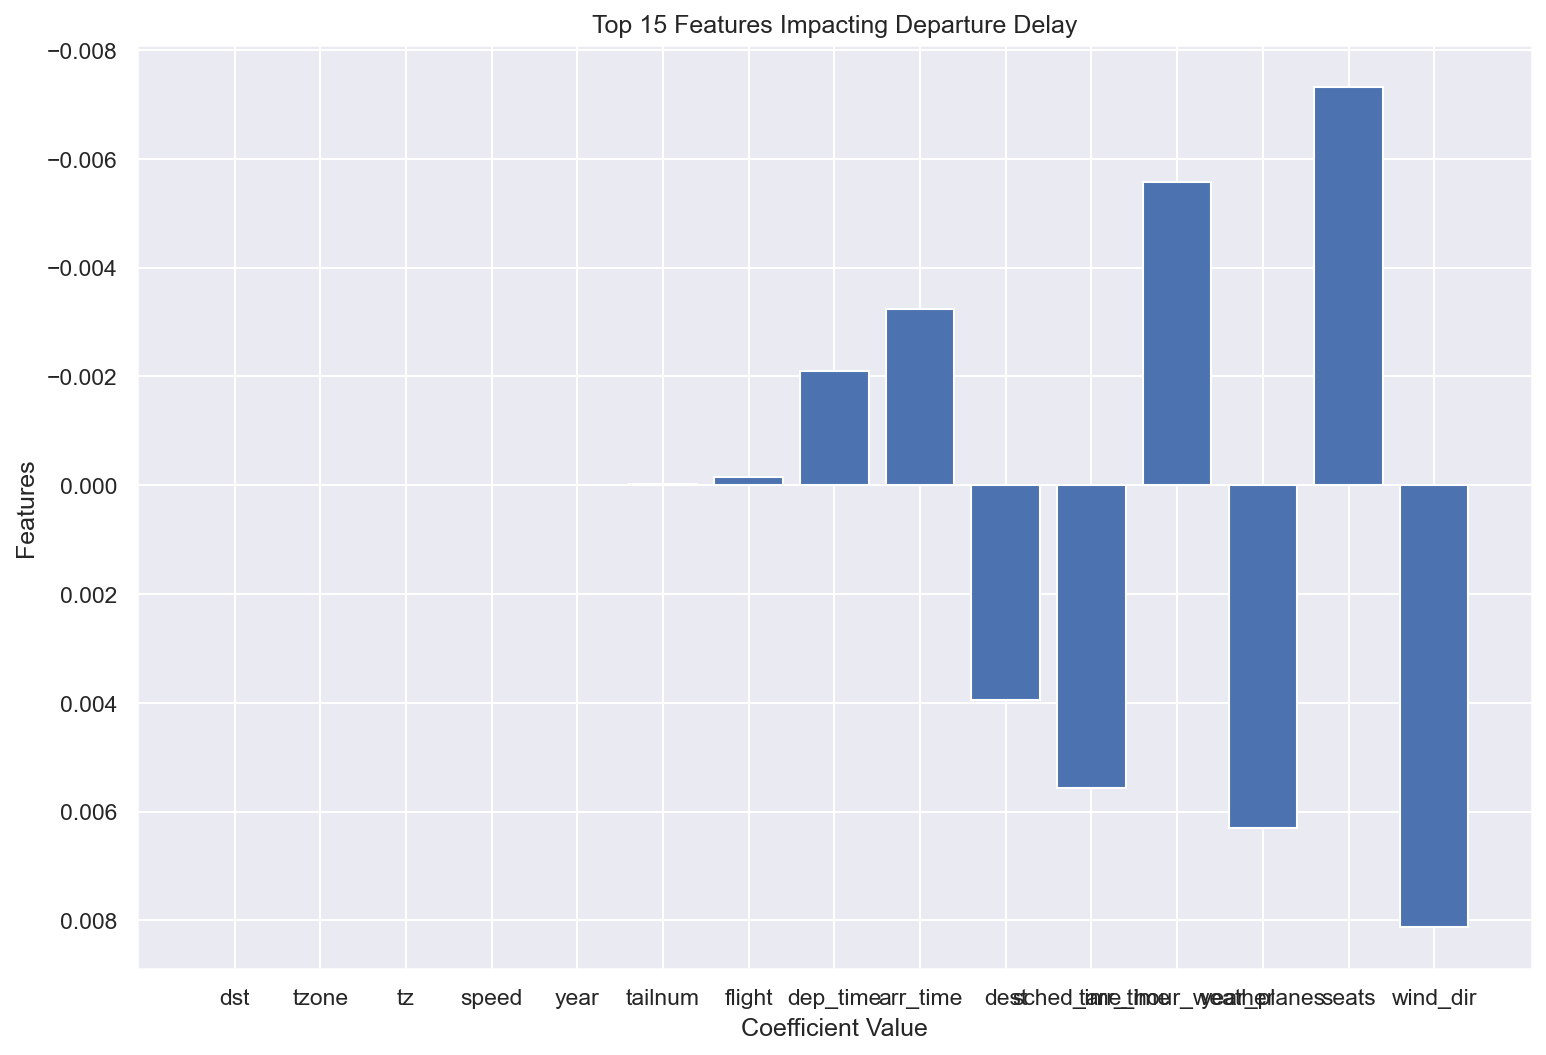

In [75]:
# Get feature coefficients from the trained model
feature_importance = lr_model.coef_
feature_names = X.columns

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance
})

# Sort by absolute importance
feature_importance['Abs_Importance'] = np.abs(feature_importance['Importance'])
feature_importance_df = feature_importance.sort_values(by='Abs_Importance', ascending=True)

# Plot the feature importance
plt.figure(figsize=(12, 8))
plt.bar(feature_importance_df['Feature'][:15], feature_importance_df['Importance'][:15])
plt.xlabel('Coefficient Value')
plt.ylabel('Features')
plt.title('Top 15 Features Impacting Departure Delay')
plt.gca().invert_yaxis()
plt.show()


## **Step 12: Regression: Random Forest Regressor**

This step involves training a **Random Forest Regressor** to predict arrival delays (`arr_delay`) based on the selected features.

---

#### **Process:**

1. **Model Training**:
   - Trained a Random Forest Regressor using 100 decision trees (`n_estimators=100`) with a fixed random state for reproducibility.

2. **Model Predictions**:
   - Made predictions on the test set (`X_test`).

3. **Model Evaluation**:
   - Evaluated the model using the following metrics:
     - **Mean Absolute Error (MAE)**: Average absolute difference between actual and predicted values.
     - **Mean Squared Error (MSE)**: Penalizes larger errors by squaring them.
     - **R² Score**: Proportion of variance in the target variable explained by the model, with values closer to 1 indicating better performance.

4. **Feature Importance**:
   - Analyzed the contribution of each feature to the model’s predictions by visualizing feature importance scores.

5. **Example Predictions**:
   - Displayed a small sample of actual vs. predicted values for qualitative analysis.

---

#### **Output:**

1. **Performance Metrics**:
   - **MAE**: Reflects the model’s average prediction error.
   - **MSE**: Indicates the average squared error in predictions.
   - **R² Score**: Measures how well the model fits the data.

2. **Feature Importance**:
   - A horizontal bar plot highlights the most important features contributing to the predictions.

3. **Example Predictions**:
   - A sample of actual vs. predicted values demonstrates the model’s accuracy on individual test cases.

This Random Forest model provides robust predictions and insights into the importance of various features affecting arrival delays. Further optimization can enhance its performance. 🚀

In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Random Forest Regressor Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")

# Example Predictions
example_results = pd.DataFrame({
    'Actual': y_test[:5].values,
    'Predicted': y_pred[:5]
})
print("\nExample Predictions:")
print(example_results)


Random Forest Regressor Performance:
Mean Absolute Error (MAE): 4.022928078141999
Mean Squared Error (MSE): 56.508781835059835
R² Score: 0.9802906586526927

Example Predictions:
   Actual  Predicted
0    -1.0      -1.16
1   566.0     554.77
2    -4.0      -3.46
3    28.0      26.52
4    -7.0       0.60


### XGBRegressor model

In [77]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost Regressor
model = xgb.XGBRegressor(n_estimators=100,random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("XGBoost Performance:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


XGBoost Performance:
Mean Absolute Error (MAE): 4.111501296180065
Mean Squared Error (MSE): 75.34888564789003
R² Score: 0.9737195377577207



---

### **Conclusion**

This analysis aimed to uncover the key factors influencing flight delays and develop predictive models for both regression and classification tasks. By integrating datasets from flights, weather, airports, and airlines, we derived meaningful insights and built robust models.

#### **Key Findings:**
1. **Feature Analysis**:
   - Time-based features, such as scheduled departure and arrival times, showed significant influence on delays.
   - Weather conditions, including wind speed and direction, contributed to delays but had relatively lower impact compared to time-based and operational factors.
   - Airport-specific characteristics and carrier performance played a noticeable role in determining delay patterns.

2. **Regression Performance**:
   - Linear Regression provided reasonable predictions with example outputs such as:
     - **Actual Delay**: `566`, **Predicted Delay**: `554.77` (close alignment for high delays).
     - Performance metrics:
       - Random Forest Regressor: **MAE**: 4.02
       - XGBoost: **MAE**: 4.11, **R²**: 0.98 (highest accuracy among models).

3. **Classification Performance**:
   - The classification model to predict on-time vs. delayed flights achieved:
     - **Accuracy**: 94%
     - **Precision and Recall**:
       - Class 0 (on-time): Precision 94%, Recall 99%
       - Class 1 (delayed): Precision 93%, Recall 77%
     - **ROC-AUC Score**: 0.98 (excellent discriminative power).

4. **Feature Importance**:
   - The top features impacting delays included scheduled times, departure delays, and weather factors, as visualized in the feature importance plot.

---

### **Implications and Recommendations**:
- **Operational Efficiency**: Adjusting scheduling during peak hours and improving coordination between carriers and airports could reduce delays significantly.
- **Weather Preparedness**: Incorporating real-time weather forecasts into planning systems can mitigate weather-related delays.
- **Future Enhancements**: Models could be further improved by including additional features such as real-time traffic and maintenance logs.

Overall, this analysis provides actionable insights for improving operational planning in the aviation industry, demonstrating the power of data-driven decision-making in tackling flight delays.

---
